## Introduction

In this notebook, I do some explaratory data analysis and preprocessing for building linear regression models as baseline for predicting song popularity scores. 

In Part 1, I load the data from the csv file that is saved at the end of the previous notebook. I drop lyrics and some other columns for now. I also clean the data from more duplicates. 

In Part 2, I provide visualizations for some exploratory data analysis.

In Part 3, I crate one-hot encoded columns from categorical columns to use in the model as features. I also change datatypes to smallest size possible for optimization. Correlations between independent variables are also shown in this part. Lastly, I log-transform right-skewed columns and create test and train splits for a baseline model.

In Part 4, I built two linear regression models using a pipeline and gridsearch. In the first model, all of the target data points are included, while popularity scores below 2 are excluded in the second model. Gridsearch includes a 5-fold cross-validation.

## Part 1 - Loading the Data and Cleaning Duplicates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# To ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# set the color palette for 
sns.set_palette("colorblind")

In [4]:
# load the data
df = pd.read_csv('../datasets/all_songs_with_some_lyrics.csv', index_col=False)
df.shape

(28347, 25)

There are 28347 rows and 25 columns in the data. In the first notebook, I checked duplicates on track_id, and then on track_artist, track_name, and track_album_id. There is one more possibility: just duplicates on track_artist and track_name. Let's check those.  

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df_sorted = df.sort_values(by=['track_artist', 'track_name']) # sort by track_artist and _track_name

duplicates = df_sorted[df_sorted.duplicated(subset=['track_artist', 'track_name'], keep=False)] # find duplicates

duplicates

track_id    track_name    track_artist  track_popularity  \
10813  5vuWELDzHEtD5K7yADIBpz  Voices Carry    'Til Tuesday                 5   
13276  0ZYf6N5eBeXStMri0mf3DZ  Voices Carry    'Til Tuesday                54   
7262   6aRlUgqcLgrxQE3RMngjN5    Good Drank        2 Chainz                 0   
7903   39pS70eeDvyCAF3t8NAlVV    Good Drank        2 Chainz                63   
5734   2fQrGHiQOvpL9UgPvtYy6G  Bank Account       21 Savage                80   
...                       ...           ...             ...               ...   
17537  1Koxb4StDE2K7XsuDunx76  Algo Musical  Ñejo & Dalmata                53   
16874  1MfqPCs3Y722VK6zkWZ98Z      Pasarela  Ñejo & Dalmata                68   
17707  0PSN9gw4qdAqqDTaR3COV5      Pasarela  Ñejo & Dalmata                 2   
8150   5BKDqwrywwngFZyLpRdPhq            Яд         Местный                45   
8824   1rmvDAMlsBggMQBzbro2rX            Яд         Местный                 1   

               track_album_id                 track_album_name  \
10813  01QZJ5r1vcjiU9GgpGfLIX                     Voices Carry   
13276  1y4s0JN8CQMRwPTJ64jCUp  Voices Carry (Expanded Edition)   
7262   1g6MBtyTxxSkT4YwhgnnIU                       Good Drank   
7903   5vvvo79z68vWj9yimoygfS     Pretty Girls Like Trap Music   
5734   4QUNWTw2FsIz722xjUjFJw                       Issa Album   
...                       ...                              ...   
17537  35ejmbRlV32Qng9jGF34ve                   Broke & Famous   
16874  35ejmbRlV32Qng9jGF34ve                   Broke & Famous   
17707  6ZnZF1KBsgeM71aB0dLWpG                   Broke & Famous   
8150   6RFizmJ3VitZBr8kwo62Kq                         Кругозор   
8824   3Z4ZQKtYzh8rQ7bodahxXy                         Кругозор   

      track_album_release_date                              playlist_name  \
10813               1985-06-25       80s Pop & Rock Hits and Album Tracks   
13276               1985-06-01                        Permanent Wave CHDB   
7262                2017-01-20  🔥💵 Hip Hop, Rap, Heavy 808's - New School   
7903                2017-06-16                           Southern Hip Hop   
5734                2017-09-23                         Hip Hop Controller   
...                        ...                                        ...   
17537               2007-01-01                            REGGAETON VIEJO   
16874               2007-01-01                Fiesta Latina Mix 🎈🎉💃🏻🕺🏻☀️🏖   
17707               2007-01-01                         Reggaeton viejito🔥   
8150                2012-10-12                       Russian Gangster Rap   
8824                2018-11-15                       RUSSIAN Gangster Rap   

                  playlist_id playlist_genre playlist_subgenre  danceability  \
10813  0XOIK4m26aeYSD61E5nSVW           rock        album rock         0.592   
13276  2foj4ZYVHRGqSd1aMqNPBj           rock    permanent wave         0.583   
7262   3jPkaExIWXQWklcmmF5180            rap  southern hip hop         0.813   
7903   57sYMLFXGD4ZqizzcMD7lz            rap  southern hip hop         0.836   
5734   37i9dQZF1DWT5MrZnPU1zD            rap           hip hop         0.884   
...                       ...            ...               ...           ...   
17537  31hG19URdBvLEpQWKFYfdD          latin         reggaeton         0.881   
16874  2kY6lVc5EcVfI5WNKmPQQG          latin         latin pop         0.798   
17707  0si5tw70PIgPkY1Eva6V8f          latin         reggaeton         0.798   
8150   0u0qLLE8MZc679RZWCk1TT            rap      gangster rap         0.607   
8824   0Jw0HckkxCfIrOvpN081eV            rap      gangster rap         0.607   

       energy  key  loudness  mode  speechiness  acousticness  \
10813     0.0    0   -13.346     1       0.0247        0.0461   
13276     0.0    0    -9.044     1       0.0239        0.0282   
7262      0.0   11    -1.199     0       0.2810        0.2810   
7903      0.0    4    -0.804     0       0.2390        0.2740   
5734      0.0    8    -8.228     0       0.3

Some of them actually have a different album name like 'xyz(expanded edition)' with different values in other columns. These might complicate things when I add lyrics though.

Let's keep it simple and drop the duplicate songs by keeping the song with higher popularity. As I've shown in the first notebook and I will show again later in this notebook, there are a lot of very low popularity scores. Choosing those with a lower popularity score to drop among the duplicates is the better option here.

In [7]:
# check for duplicates based on track_artist and track_name
duplicates = df[df.duplicated(subset=['track_artist', 'track_name'], keep=False)]

# sort the duplicates by 'track_popularity' in descending order
duplicates_with_highest_popularity = duplicates.sort_values(by='track_popularity', ascending=False)

# drop duplicates among these, keep only the first occurrence
duplicates_to_keep = duplicates_with_highest_popularity.drop_duplicates(subset=['track_artist', 'track_name'], keep='first')

# remove duplicate rows from the original DataFrame
df = df.drop_duplicates(subset=['track_artist', 'track_name'], keep=False)

# concatenate the dataframe without duplicates and the ones to keep with the highest popularity
df = pd.concat([df, duplicates_to_keep])
df.shape

(26229, 25)

In [8]:
duplicates_to_keep.shape

(1701, 25)

In [9]:
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748     0.0    6    -2.634     1       0.0583        0.1020   
1         0.726     0.0   11    -4.969     1       0.0373        0.0724   
2         0.675     0.0    1    -3.432     0       0.0742        0.0794   
3         0.718     0.0    7    -3.778     1       0.1020        0.0287   
4         0.650     0.0    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms track_lyrics  \
0          0.000000    0.0653    0.518  122.036       194754          NaN   
1          0.004210    0.3570    0.693   99.972       162600          NaN   
2          0.000023    0.1100    0.613  124.008       176616          NaN   
3          0.000009    0.2040    0.277  121.956       169093          NaN   
4          0.000000    0.0833    0.725  123.976       189052          NaN   

  artist_gender  
0          Male  
1          Male  
2        Female  
3        Female  
4          Male

Let's drop the columns for lyrics, since we do not have all of the lyrics. Let's also drop  the column for the artist gender, since the majority is 'unknown', as it can bee seen below.

In [10]:
df['artist_gender'].value_counts(normalize=True)

artist_gender
Unknown    0.612528
Male       0.229517
Female     0.145145
Andy       0.012810
Name: proportion, dtype: float64

In [11]:
df = df.drop(columns=['track_lyrics', 'artist_gender'], axis=1)
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748     0.0    6    -2.634     1       0.0583        0.1020   
1         0.726     0.0   11    -4.969     1       0.0373        0.0724   
2         0.675     0.0    1    -3.432     0       0.0742        0.0794   
3         0.718     0.0    7    -3.778     1       0.1020        0.0287   
4         0.650     0.0    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616  
3          0.000009    0.2040    0.277  121.956       169093  
4          0.000000    0.0833    0.725  123.976       189052

In [12]:
df['track_id'].nunique() # number of track_id is the same as row number

26229

In [13]:
df = df.set_index('track_id') # make the track_id column the index
df.head()

track_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

                            track_artist  track_popularity  \
track_id                                                     
6f807x0ima9a1j3VPbc7VN        Ed Sheeran                66   
0r7CVbZTWZgbTCYdfa2P31          Maroon 5                67   
1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson                70   
75FpbthrwQmzHlBJLuGdC7  The Chainsmokers                60   
1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi                69   

                                track_album_id  \
track_id                                         
6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx   
0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6   
1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4   
75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6   
1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ   

                                                         track_album_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) [Loud Luxury...   
0r7CVbZTWZgbTCYdfa2P31                    Memories (Dillon Francis Remix)   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time (Don Diablo Remix)   
75FpbthrwQmzHlBJLuGdC7                        Call You Mine - The Remixes   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved (Future Humans Remix)   

                       track_album_release_date playlist_name  \
track_id                                                        
6f807x0ima9a1j3VPbc7VN               2019-06-14     Pop Remix   
0r7CVbZTWZgbTCYdfa2P31               2019-12-13     Pop Remix   
1z1Hg7Vb0AhHDiEmnDE79l               2019-07-05     Pop Remix   
75FpbthrwQmzHlBJLuGdC7               2019-07-19     Pop Remix   
1e8PAfcKUYoKkxPhrHqw4x               2019-03-05     Pop Remix   

                                   playlist_id playlist_genre  \
track_id                                                        
6f807x0ima9a1j3VPbc7VN  37i9dQZF1DXcZDD7cfEKhW            pop   
0r7CVbZTWZgbTCYdfa2P31  37i9dQZF1DXcZDD7cfEKhW            pop   
1z1Hg7Vb0AhHDiEmnDE79l  37i9dQZF1DXcZDD7cfEKhW            pop   
75FpbthrwQmzHlBJLuGdC7  37i9dQZF1DXcZDD7cfEKhW            pop   
1e8PAfcKUYoKkxPhrHqw4x  37i9dQZF1DXcZDD7cfEKhW            pop   

                       playlist_subgenre  danceability  energy  key  loudness  \
track_id                                                                        
6f807x0ima9a1j3VPbc7VN         dance pop         0.748     0.0    6    -2.634   
0r7CVbZTWZgbTCYdfa2P31         dance pop         0.726     0.0   11    -4.969   
1z1Hg7Vb0AhHDiEmnDE79l         dance pop         0.675     0.0    1    -3.432   
75FpbthrwQmzHlBJLuGdC7         dance pop         0.718     0.0    7    -3.778   
1e8PAfcKUYoKkxPhrHqw4x         dance pop         0.650     0.0    1    -4.672   

                        mode  speechiness  acousticness  instrumentalness  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN     1       0.0583        0.1020          0.000000   
0r7CVbZTWZgbTCYdfa2P31     1       0.0373        0.0724          0.004210   
1z1Hg7Vb0AhHDiEmnDE79l     0       0.0742        0.0794          0.000023   
75FpbthrwQmzHlBJLuGdC7     1       0.1020        0.0287          0.000009   
1e8PAfcKUYoKkxPhrHqw4x     1       0.0359        0.0803          0.000000   

                        liveness  valence    tempo  duration_ms  
track_id                                                         
6f807x0ima9a1j3VPbc7VN    0.0653    0.518  12

As I have shown in the previous notebook, the energy column is not very informative either. 

In [14]:
df['energy'].value_counts(normalize=True) # almost all of the values are 0

energy
0.0    0.999886
1.0    0.000114
Name: proportion, dtype: float64

Let's drop this column as well.

In [15]:
df = df.drop('energy', axis=1) 
df.head()

track_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

                            track_artist  track_popularity  \
track_id                                                     
6f807x0ima9a1j3VPbc7VN        Ed Sheeran                66   
0r7CVbZTWZgbTCYdfa2P31          Maroon 5                67   
1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson                70   
75FpbthrwQmzHlBJLuGdC7  The Chainsmokers                60   
1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi                69   

                                track_album_id  \
track_id                                         
6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx   
0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6   
1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4   
75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6   
1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ   

                                                         track_album_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) [Loud Luxury...   
0r7CVbZTWZgbTCYdfa2P31                    Memories (Dillon Francis Remix)   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time (Don Diablo Remix)   
75FpbthrwQmzHlBJLuGdC7                        Call You Mine - The Remixes   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved (Future Humans Remix)   

                       track_album_release_date playlist_name  \
track_id                                                        
6f807x0ima9a1j3VPbc7VN               2019-06-14     Pop Remix   
0r7CVbZTWZgbTCYdfa2P31               2019-12-13     Pop Remix   
1z1Hg7Vb0AhHDiEmnDE79l               2019-07-05     Pop Remix   
75FpbthrwQmzHlBJLuGdC7               2019-07-19     Pop Remix   
1e8PAfcKUYoKkxPhrHqw4x               2019-03-05     Pop Remix   

                                   playlist_id playlist_genre  \
track_id                                                        
6f807x0ima9a1j3VPbc7VN  37i9dQZF1DXcZDD7cfEKhW            pop   
0r7CVbZTWZgbTCYdfa2P31  37i9dQZF1DXcZDD7cfEKhW            pop   
1z1Hg7Vb0AhHDiEmnDE79l  37i9dQZF1DXcZDD7cfEKhW            pop   
75FpbthrwQmzHlBJLuGdC7  37i9dQZF1DXcZDD7cfEKhW            pop   
1e8PAfcKUYoKkxPhrHqw4x  37i9dQZF1DXcZDD7cfEKhW            pop   

                       playlist_subgenre  danceability  key  loudness  mode  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN         dance pop         0.748    6    -2.634     1   
0r7CVbZTWZgbTCYdfa2P31         dance pop         0.726   11    -4.969     1   
1z1Hg7Vb0AhHDiEmnDE79l         dance pop         0.675    1    -3.432     0   
75FpbthrwQmzHlBJLuGdC7         dance pop         0.718    7    -3.778     1   
1e8PAfcKUYoKkxPhrHqw4x         dance pop         0.650    1    -4.672     1   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
6f807x0ima9a1j3VPbc7VN       0.0583        0.1020          0.000000    0.0653   
0r7CVbZTWZgbTCYdfa2P31       0.0373        0.0724          0.004210    0.3570   
1z1Hg7Vb0AhHDiEmnDE79l       0.0742        0.0794          0.000023    0.1100   
75FpbthrwQmzHlBJLuGdC7       0.1020        0.0287          0.000009    0.2040   
1e8PAfcKUYoKkxPhrHqw4x       0.0359        0.0803          0.000000    0.0833   

                        valence    tempo  duration_ms  
track_id                                               
6f807x0ima9a1j3VPbc7VN    0.518  122.036       1947

In the next part, I visualize the relationship between the target variable `track_popularity` and the independent variables in the dataset.

## Part 2 - Exploratory Data Analysis with Visualizations

Let's start with a histogram of the target variable.

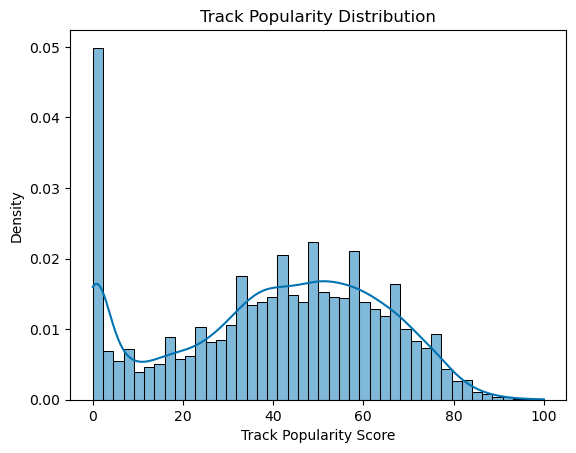

In [16]:
plt.figure()
sns.histplot(df['track_popularity'], kde=True, stat='density')
plt.title('Track Popularity Distribution')
plt.xlabel('Track Popularity Score')
plt.show()

In [17]:
df['track_popularity'].value_counts()

track_popularity
0      2264
51      463
45      457
54      455
50      455
       ... 
97        3
95        2
96        1
100       1
99        1
Name: count, Length: 101, dtype: int64

There are 2264 songs with a popularity score of zero! I might run two linear regression models to see if dropping these zero popularity songs improve the model.

### Part 2.1 - Categorical Columns

The values in the `track_album_release_date` column is not in a datetime datatype. Let's fix that and create columns for album release month and decade.

In [18]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format='mixed') # python complained and told me to add format='mixed'

In [19]:
df['album_month'] = df['track_album_release_date'].dt.month # add an album_month column

In [20]:
df['album_year'] = df['track_album_release_date'].dt.year # add an album_year column

In [21]:
# add an album decade column
df['album_decade'] = df['album_year'].apply(lambda year: (year // 10) * 10)

In [22]:
# drop album_release_date and album_year columns
df = df.drop(columns = ['track_album_release_date', 'album_year'], axis=1)
df.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_id',
       'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'album_month', 'album_decade'],
      dtype='object')

#### How does track popularity change by album month?

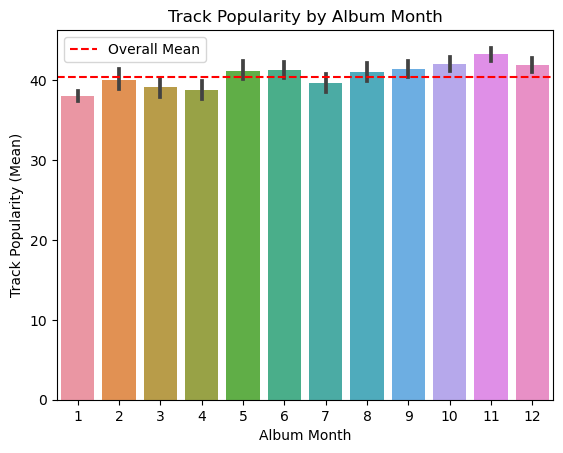

In [23]:
plt.figure()
sns.barplot(x='album_month', y='track_popularity', data=df, estimator='mean')
plt.title('Track Popularity by Album Month')
plt.xlabel('Album Month')
plt.ylabel('Track Popularity (Mean)')
plt.axhline(y=df['track_popularity'].mean(), color='r', linestyle='--', label='Overall Mean')
plt.legend()
plt.show()

Summer month albums are sometimes more popular, but this does not seem to be the case in this dataset. Popularity scores are similar across all months, around the overall mean of 40. From January to December, popularity scores overall increase, although this trend is not perfect. 

In preprocessing (part 3), I will create dummy variables from `Album_Month` and change them to encode yearly quarters. So January, Februay, March will be encoded under Quarter1 etc.

#### How does track popularity change by album decade?

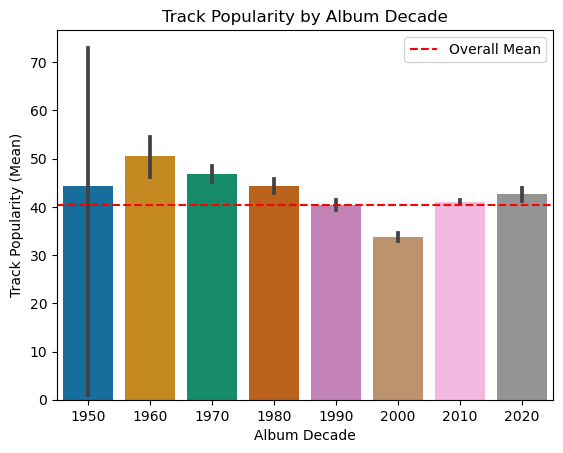

In [24]:
plt.figure()

sns.barplot(x='album_decade', y='track_popularity', data=df, estimator='mean')
plt.title('Track Popularity by Album Decade')
plt.xlabel('Album Decade')
plt.ylabel('Track Popularity (Mean)')
plt.axhline(y=df['track_popularity'].mean(), color='r', linestyle='--', label='Overall Mean')
plt.legend()

plt.show()

In [25]:
df['album_decade'].value_counts(normalize=True)

album_decade
2010    0.713866
2000    0.124595
1990    0.069923
1980    0.036944
1970    0.026383
2020    0.023714
1960    0.004461
1950    0.000114
Name: proportion, dtype: float64

Most of the songs, 71%, are from 2010s, which have a mean popularity score of a little over the overall mean, around 41. Songs from the 1950s are less than 1% in the dataset, and they have wide range of popularity scores. 

In preprocessing (part 3), I  will create dummy variables for each decade; that is, I will not group them in any way.

#### How does track popularity change by genre?

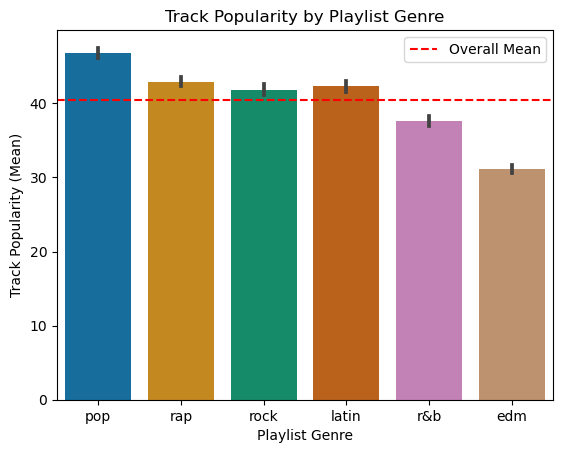

In [26]:
plt.figure()

sns.barplot(x='playlist_genre', y='track_popularity', data=df, estimator='mean')
plt.title('Track Popularity by Playlist Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Track Popularity (Mean)')
plt.axhline(y=df['track_popularity'].mean(), color='r', linestyle='--', label='Overall Mean')
plt.legend()

plt.show()

The most popular genres are pop and rap, while the least are r&b and edm. Let's also check subgenres since they should present a more detailed picture.

#### How does track popularity chane by subgenre?

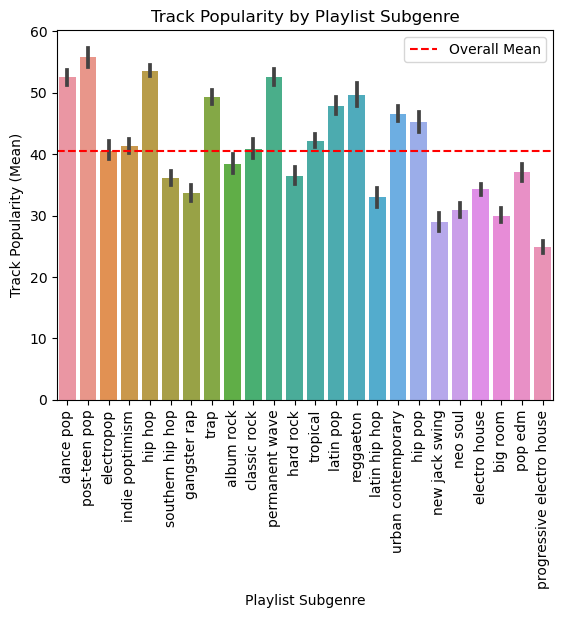

In [27]:
plt.figure()

sns.barplot(x='playlist_subgenre', y='track_popularity', data=df, estimator='mean')
plt.title('Track Popularity by Playlist Subgenre')
plt.xlabel('Playlist Subgenre')
plt.ylabel('Track Popularity (Mean)')
plt.axhline(y=df['track_popularity'].mean(), color='r', linestyle='--', label='Overall Mean')
plt.legend()
plt.xticks(rotation=90)
plt.show()

There is a lot more variation, great! I will keep the `playlist_subgenre` variable instead of the genre in the model. The most popular subgenre is post teen pop while the least popular one is new jack swing.

In preprocessing (part 3), I will create a dummy variable for each subgenre.

#### How does track popularity change by key?

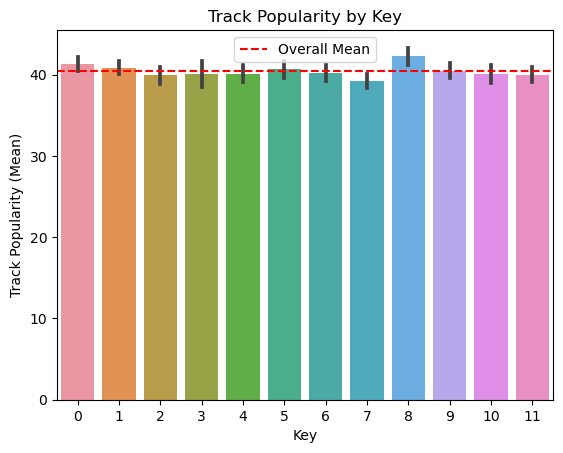

In [28]:
plt.figure()

sns.barplot(x='key', y='track_popularity', data=df, estimator='mean')
plt.title('Track Popularity by Key')
plt.xlabel('Key')
plt.ylabel('Track Popularity (Mean)')
plt.axhline(y=df['track_popularity'].mean(), color='r', linestyle='--', label='Overall Mean')
plt.legend()

plt.show()

Here keys are encoded as follows: 0 = C, 1 = C♯/D♭, 2 = D, and so on. The mean popularity score doesn't seem to change much by the estimated overall key of the song.

In preprocessing, I will create a dummy variable from each key, not grouping them in any way. I consulted a song-writer friend while making this decision.

#### How does track popularity change by mode?

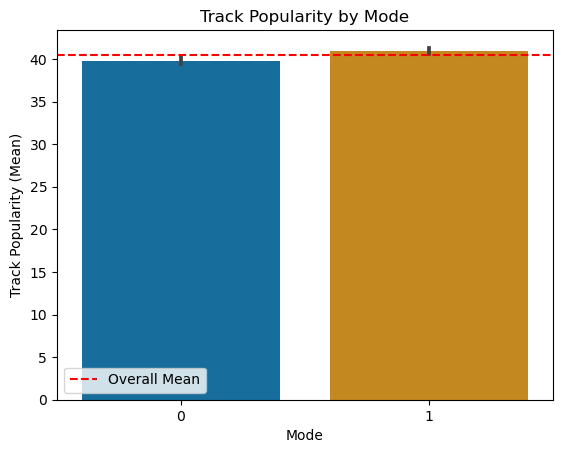

In [29]:
plt.figure()

sns.barplot(x='mode', y='track_popularity', data=df, estimator='mean')
plt.title('Track Popularity by Mode')
plt.xlabel('Mode')
plt.ylabel('Track Popularity (Mean)')
plt.axhline(y=df['track_popularity'].mean(), color='r', linestyle='--', label='Overall Mean')
plt.legend()

plt.show()

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. They are almost the same, right at the mean. 

This column will stay the same in preprocessing.

In [30]:
df['mode'].value_counts(normalize=True)

mode
1    0.56388
0    0.43612
Name: proportion, dtype: float64

56% of the mode in the data is 1 (major) while 44% is 0 (minor).

If we group the data by key and mode, mean popularity scores are still very similar.

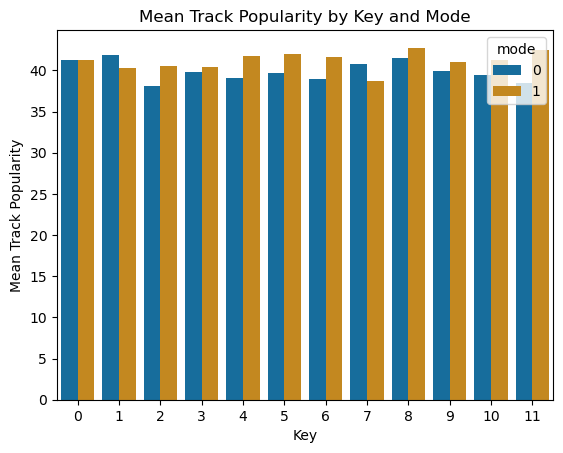

In [31]:
# group by 'key' and 'mode'
grouped_df = df.groupby(['key', 'mode'])['track_popularity'].mean().reset_index()

plt.figure()
sns.barplot(data=grouped_df, x='key', y='track_popularity', hue='mode', estimator='mean')
plt.xlabel('Key')
plt.ylabel('Mean Track Popularity')
plt.title('Mean Track Popularity by Key and Mode')
plt.show()

Let's move on to numeric columns!

### Part 2.2 - Numeric Columns

In [32]:
from scipy.stats import linregress

Here are the histograms for the numeric columns.

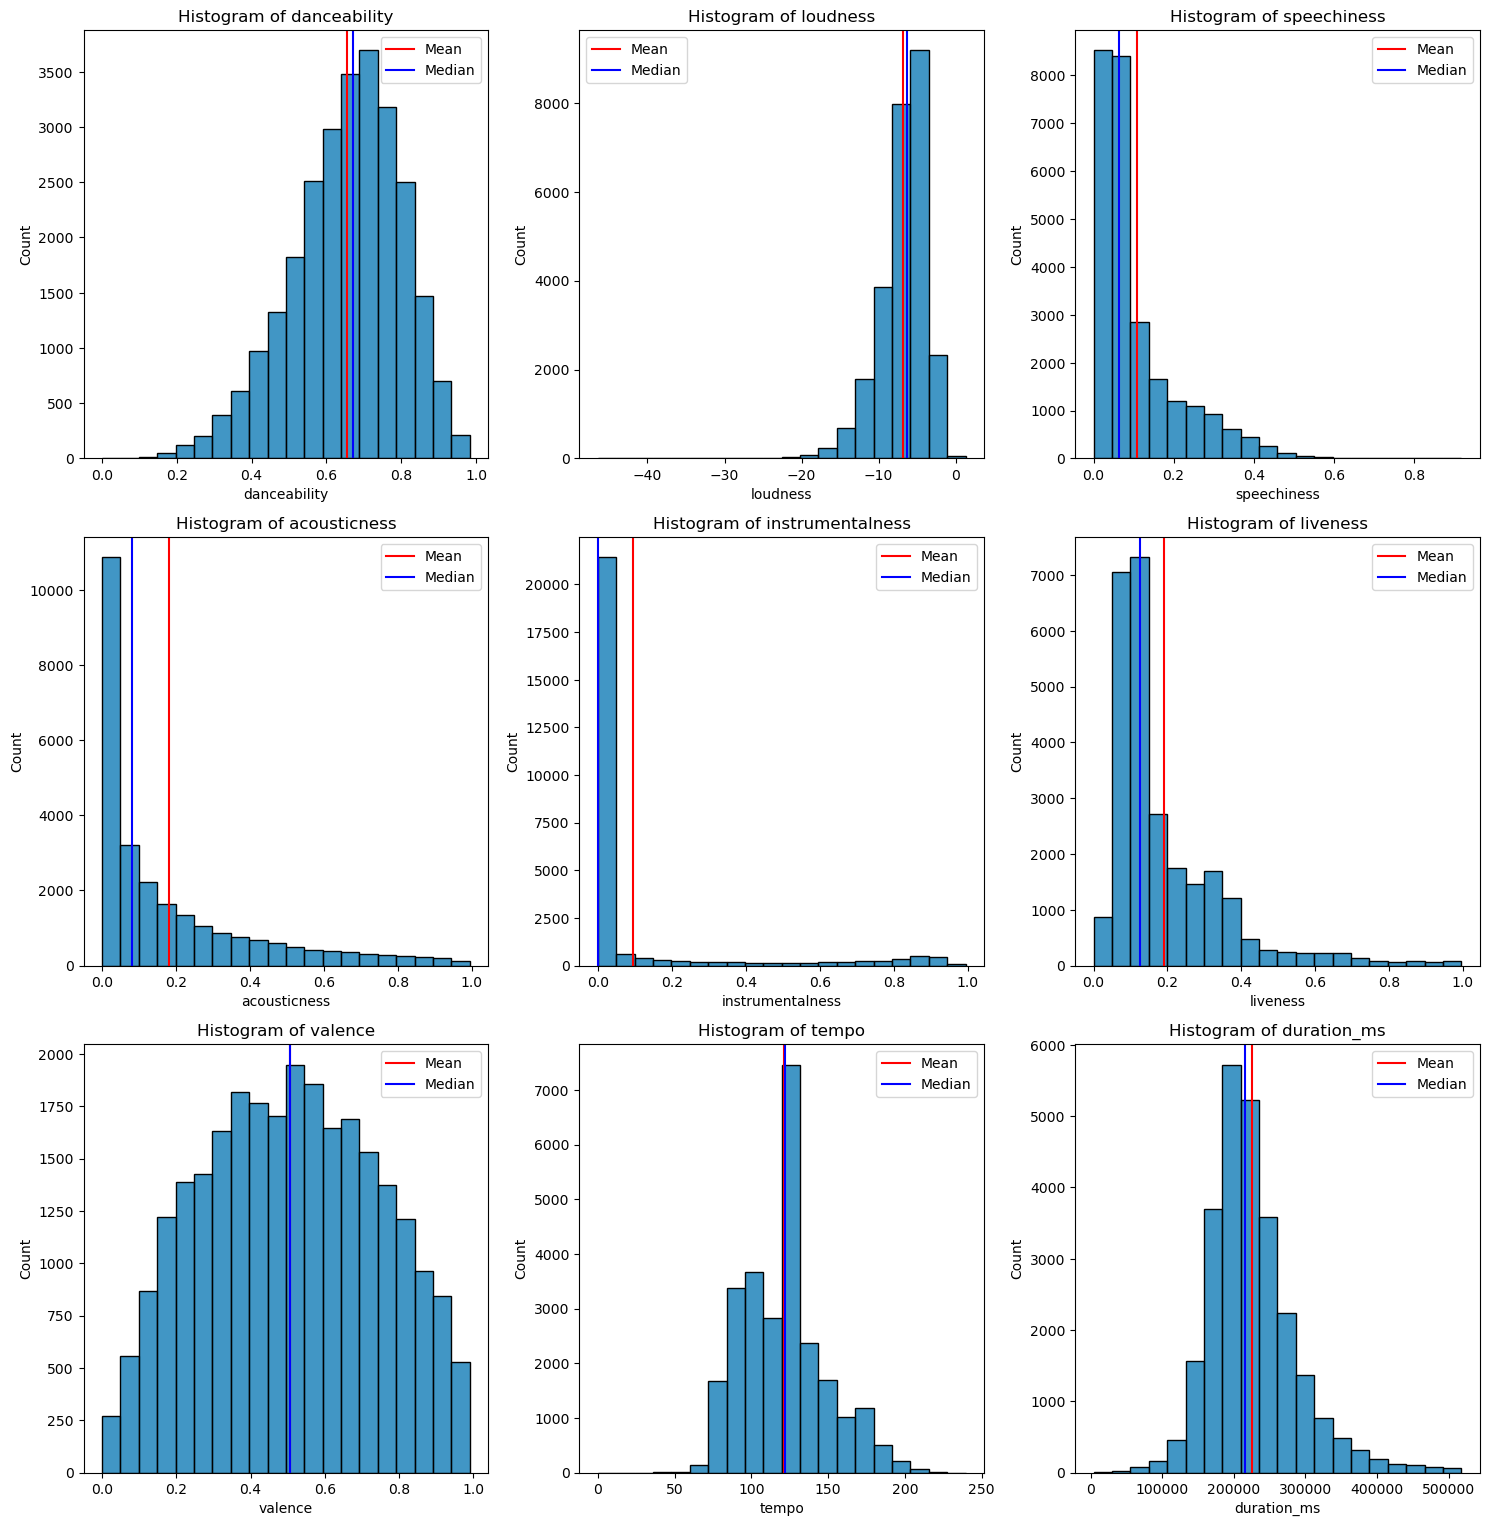

In [33]:
num_cols = ['danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
           'tempo', 'duration_ms']

plt.subplots(3,3, figsize=(15,20))

for i, col in enumerate(num_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], bins=20)
    plt.axvline(df[col].mean(), label="Mean", color='red')
    plt.axvline(df[col].median(), label="Median", color='blue')
    plt.title(f'Histogram of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

Some of them have a normal-like distribution, but some are skewed. I might need to log-transform the skewed ones before modeling: speechiness, acousticness, instrumentalness, and liveness. 

Let's move on to how track popularity change by each of these variables.

#### How does track popularity change by danceability?

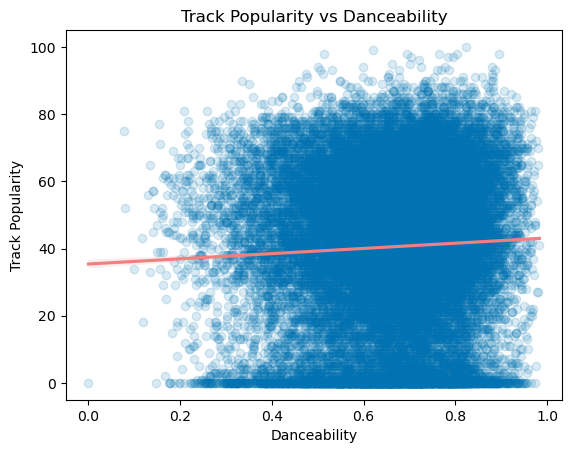

Slope of the trendline: 7.741, p-value < 0.05 is True


In [34]:
plt.figure()

sns.regplot(x='danceability', y='track_popularity', data=df, 
            scatter_kws={'alpha':0.15}, line_kws={"color": "lightcoral"})
plt.title('Track Popularity vs Danceability')
plt.xlabel('Danceability')
plt.ylabel('Track Popularity')

plt.show()

x=df['danceability'] 
y=df['track_popularity']

# the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope of the trendline: {slope.round(3)}, p-value < 0.05 is {p_value < 0.05}")

As danceability increases, so does the popularity. 

#### How does track popularity change by loudness?

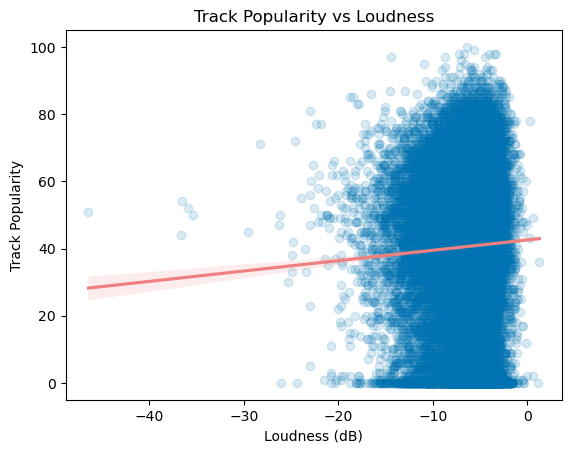

Slope of the trendline: 0.308, p-value < 0.05 is True


In [35]:
plt.figure()

sns.regplot(x='loudness', y='track_popularity', data=df, 
            scatter_kws={'alpha':0.15}, line_kws={"color": "lightcoral"})
plt.title('Track Popularity vs Loudness')
plt.xlabel('Loudness (dB)')
plt.ylabel('Track Popularity')

plt.show()

x=df['loudness'] 
y=df['track_popularity']

# the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope of the trendline: {slope.round(3)}, p-value < 0.05 is {p_value < 0.05}")

As loudness (dB) gets closer to 0, popularity increases. Loudness might already be log-transformed.

#### How does track popularity change by speechiness?

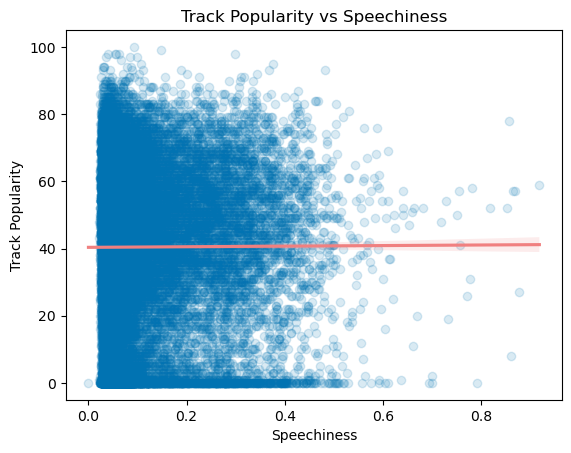

Slope of the trendline: 0.874, p-value < 0.05 is False


In [36]:
plt.figure()

sns.regplot(x='speechiness', y='track_popularity', data=df, 
            scatter_kws={'alpha':0.15}, line_kws={"color": "lightcoral"})
plt.title('Track Popularity vs Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Track Popularity')

plt.show()

x=df['speechiness'] 
y=df['track_popularity']

# the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope of the trendline: {slope.round(3)}, p-value < 0.05 is {p_value < 0.05}")

The popularity only very slightly increases as speechiness increases.

According to the data dictionary of the original source, speechiness above 0.66 describe tracks that are probably made entirely of spoken words. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Let's see what tracks have speechiness above 0.66.

In [37]:
df_speech = df[df['speechiness']>0.66]
df_speech.head()

track_name  track_artist  \
track_id                                                             
63Ly2sEzloc9s0yAXlMi6r  Warm Water - Snakehips Remix         BANKS   
13SKaktrtIUyqwWcHvwnIO                         Float    SPEECHLESS   
08Ovag8PDrT7VC2ZkZLYmz            al pasito/timeless   n o r m a l   
3X55wToVhDnQ0Tlt2OU9Sz                 Happy To Help  Fallen Roses   
5yVj39dpZ4jThGXf2mEhYI                fortune cookie         B0nds   

                        track_popularity          track_album_id  \
track_id                                                           
63Ly2sEzloc9s0yAXlMi6r                57  41xJklJV7uqDzg9teggeR6   
13SKaktrtIUyqwWcHvwnIO                57  2wm0xTydItvOQjLdJIL4GM   
08Ovag8PDrT7VC2ZkZLYmz                57  4SmYuNnhuDaBZFzH0AOyai   
3X55wToVhDnQ0Tlt2OU9Sz                52  5fOLpiXe6dB31JVSwmqD3B   
5yVj39dpZ4jThGXf2mEhYI                48  4zTohprqCBPHuw04qvVNEs   

                                    track_album_name     playlist_name  \
track_id                                                                 
63Ly2sEzloc9s0yAXlMi6r  Warm Water (Snakehips Remix)  Indie Poptimism!   
13SKaktrtIUyqwWcHvwnIO                         Float       Lo-Fi Beats   
08Ovag8PDrT7VC2ZkZLYmz            al pasito timeless       Lo-Fi Beats   
3X55wToVhDnQ0Tlt2OU9Sz                 Happy To Help       Lo-Fi Beats   
5yVj39dpZ4jThGXf2mEhYI                fortune cookie      Lofi Hip-Hop   

                                   playlist_id playlist_genre  \
track_id                                                        
63Ly2sEzloc9s0yAXlMi6r  4hKPJNFIhdAg4pAksn78FJ            pop   
13SKaktrtIUyqwWcHvwnIO  37i9dQZF1DWWQRwui0ExPn            rap   
08Ovag8PDrT7VC2ZkZLYmz  37i9dQZF1DWWQRwui0ExPn            rap   
3X55wToVhDnQ0Tlt2OU9Sz  37i9dQZF1DWWQRwui0ExPn            rap   
5yVj39dpZ4jThGXf2mEhYI  37i9dQZF1DX36Xw4IJIVKA            rap   

                       playlist_subgenre  danceability  key  loudness  mode  \
track_id                                                                      
63Ly2sEzloc9s0yAXlMi6r   indie poptimism         0.511    4    -6.858     0   
13SKaktrtIUyqwWcHvwnIO           hip hop         0.661   11   -10.504     1   
08Ovag8PDrT7VC2ZkZLYmz           hip hop         0.576    6   -18.660     0   
3X55wToVhDnQ0Tlt2OU9Sz           hip hop         0.722    1   -15.275     1   
5yVj39dpZ4jThGXf2mEhYI           hip hop         0.561    8    -5.721     1   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
63Ly2sEzloc9s0yAXlMi6r        0.869         0.241          0.000000    0.0948   
13SKaktrtIUyqwWcHvwnIO        0.755         0.970          0.878000    0.0856   
08Ovag8PDrT7VC2ZkZLYmz        0.865         0.659          0.473000    0.1540   
3X55wToVhDnQ0Tlt2OU9Sz        0.682         0.689          0.693000    0.0639   
5yVj39dpZ4jThGXf2mEhYI        0.718         0.437          0.000019    0.5860   

                        valence    tempo  duration_ms  album_month  \
track_id                                                             
63Ly2sEzloc9s0yAXlMi6r    0.405  212.137       253585            8   
13SKaktrtIUyqwWcHvwnIO    0.374   78.031       138678           11   
08Ovag8PDrT7VC2ZkZLYmz    0.858   86.010       190457            6   
3X55wToVhDnQ0Tlt2OU9Sz    0.541  120.054       112053            1   
5yVj39dpZ4jThGXf2mEhYI    0.789  150.956       107532            6   

                        album_decade  
track_id                              
63Ly2sEzloc9s0yAXlMi6r          2010  
13SKaktrtIUyqwWcHvwnIO          2010  
08Ovag8PDrT7VC2ZkZLYmz          2010  
3X55wToVhDnQ0Tlt2OU9Sz          2020  
5yVj39dpZ4jThGXf2mEhYI          2010

In [38]:
df_speech.shape # shows that there are 25 rows and 22 columns

(24, 22)

In [39]:
df_speech # let's see what they are

track_name  \
track_id                                                  
63Ly2sEzloc9s0yAXlMi6r     Warm Water - Snakehips Remix   
13SKaktrtIUyqwWcHvwnIO                            Float   
08Ovag8PDrT7VC2ZkZLYmz               al pasito/timeless   
3X55wToVhDnQ0Tlt2OU9Sz                    Happy To Help   
5yVj39dpZ4jThGXf2mEhYI                   fortune cookie   
5uLZgToTLTRBXXcekii3Yo                      Intoxicated   
3enjxX3aOAsFyaKeH1O9jO               Sound Bwoy Bureill   
5qXDMDeaGVoWIRAIQ7aCcd              True Colors/It's On   
5GR1vgM7Pppp888xQ0Db63        I'm Going to Live My Life   
5N4av3FvMyJcMRsjnx5TYk                    Keep It on Me   
2mvOTgcGE2RagkpO0ETdAK                 Kick In The Door   
2K1mELiqdNYk5cl6LNwqCp                      Kranichstil   
4GYWNXDrG5wWOJteicSy7b                    '98 Freestyle   
68cje2NtCyi0iRqFkdzjwq                      Dieses Boot   
0cD95iBmLYrI92Tfdr1coS                     Für die Gang   
195XLaBInYvnJMo4fzLNql                               ЧП   
3ngpmF7yiqVMesqqGuepX1                          BIRDBOY   
6gNTUALYq5cQXVCwXR7snp                      JUST SAYING   
4Ag89Y7qSUrpxcgRtSzSam                          D(R)Own   
5dBP9gDiDlsXiitxvB4HGb  Scrying Through Shattered Glass   
1fSHWLTwlHMnNIbF2dhP1Z                Something Summery   
0DMUrG0gEPjMhn3G3hkC4r                       Stupéfiant   
5ZbJR1AfdOsvsYNuCvgqKX                         I'M DEAD   
5lw8Mgb4LyhriPIC86gV6e       RNP (feat. Anderson .Paak)   

                                           track_artist  track_popularity  \
track_id                                                                    
63Ly2sEzloc9s0yAXlMi6r                            BANKS                57   
13SKaktrtIUyqwWcHvwnIO                       SPEECHLESS                57   
08Ovag8PDrT7VC2ZkZLYmz                      n o r m a l                57   
3X55wToVhDnQ0Tlt2OU9Sz                     Fallen Roses                52   
5yVj39dpZ4jThGXf2mEhYI                            B0nds                48   
5uLZgToTLTRBXXcekii3Yo                 Hitman Sammy Sam                 8   
3enjxX3aOAsFyaKeH1O9jO                    Smif-N-Wessun                52   
5qXDMDeaGVoWIRAIQ7aCcd                         The Game                31   
5GR1vgM7Pppp888xQ0Db63  DJ Screw & The Screwed Up Click                 2   
5N4av3FvMyJcMRsjnx5TYk                     Dewey da Don                27   
2mvOTgcGE2RagkpO0ETdAK             The Notorious B.I.G.                 0   
2K1mELiqdNYk5cl6LNwqCp                          Olexesh                20   
4GYWNXDrG5wWOJteicSy7b                            Big L                 0   
68cje2NtCyi0iRqFkdzjwq                             Gzuz                41   
0cD95iBmLYrI92Tfdr1coS                            Bosca                19   
195XLaBInYvnJMo4fzLNql                         N1NT3ND0                26   
3ngpmF7yiqVMesqqGuepX1                       NLE Choppa                52   
6gNTUALYq5cQXVCwXR7snp                      Comethazine                54   
4Ag89Y7qSUrpxcgRtSzSam                       Ghostemane                58   
5dBP9gDiDlsXiitxvB4HGb                       Ghostemane                50   
1fSHWLTwlHMnNIbF2dhP1Z                  Cozy Collective                52   
0DMUrG0gEPjMhn3G3hkC4r                            Rim'K                 0   
5ZbJR1AfdOsvsYNuCvgqKX                         Duckwrth                59   
5lw8Mgb4LyhriPIC86gV6e                       YBN Cordae                78   

                                track_album_id  \
track_id                                         
63Ly2sEzloc9s0yAXlMi6r  41xJklJV7uqDzg9teggeR6   
13SKaktrtIUyqwWcHvwnIO  2wm0xTydItvOQjLdJIL4GM   
08Ovag8PDrT7VC2ZkZLYmz  4SmYuNnhuDaBZFzH0AOyai   
3X55wToVhDnQ0Tlt2OU9Sz  5fOLpiXe6dB31JVSwmqD3B   
5yVj39dpZ4jThGXf2mEhYI  4zTohprqCBPHuw04qvVNEs   
5uLZgToTLTRBXXcekii3Yo  03li45Op7ylSlWrouSReBC   
3enjxX3aOAsFyaKeH1O9jO  0TaYPOKCUDyvZU2APQ7kPM   
5qXDMDeaGVoWIRAIQ7aCcd  0Fn0R9r4naqKNDjCTEg5e7   
5GR1vgM

I will keep them all since none of them looks not like a song. 

#### How does track popularity change by acousticness?

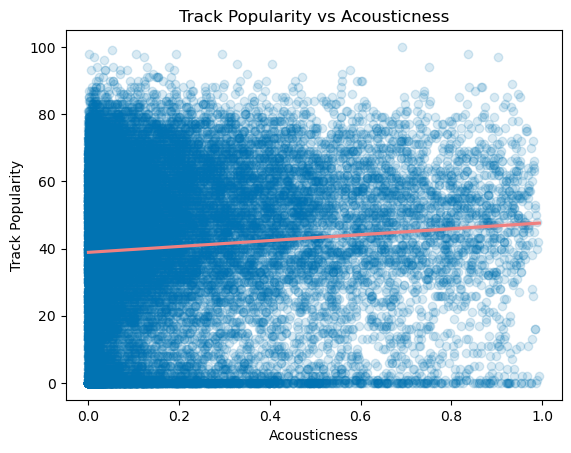

Slope of the trendline: 8.763, p-value < 0.05 is True


In [40]:
plt.figure()

sns.regplot(x='acousticness', y='track_popularity', data=df, 
            scatter_kws={'alpha':0.15}, line_kws={"color": "lightcoral"})
plt.title('Track Popularity vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Track Popularity')

plt.show()

x=df['acousticness'] 
y=df['track_popularity']

# the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope of the trendline: {slope.round(3)}, p-value < 0.05 is {p_value < 0.05}")

Track popularity increases with acousticness.

#### How does track popularity change by instrumentalness?

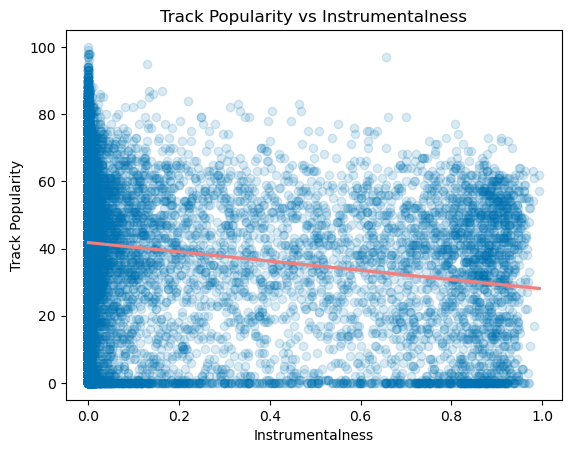

Slope of the trendline: -13.734, p-value < 0.05 is True


In [41]:
plt.figure()

sns.regplot(x='instrumentalness', y='track_popularity', data=df, 
            scatter_kws={'alpha':0.15}, line_kws={"color": "lightcoral"})
plt.title('Track Popularity vs Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Track Popularity')

plt.show()

x=df['instrumentalness'] 
y=df['track_popularity']

# the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope of the trendline: {slope.round(3)}, p-value < 0.05 is {p_value < 0.05}")

Track popularity decreases as instrumentalness increases. 

#### How does track popularity change by liveness?

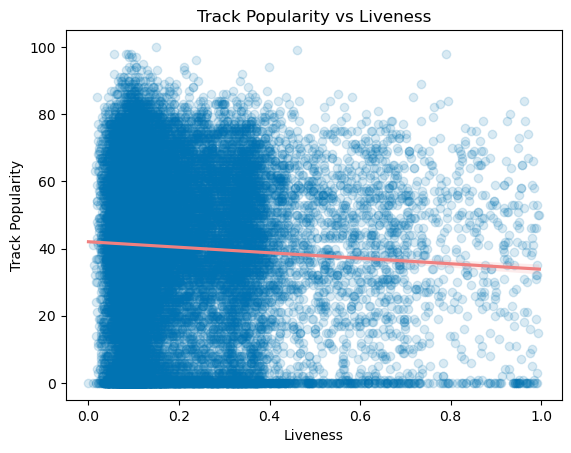

Slope of the trendline: -8.179, p-value < 0.05 is True


In [42]:
plt.figure()

sns.regplot(x='liveness', y='track_popularity', data=df, 
            scatter_kws={'alpha':0.15}, line_kws={"color": "lightcoral"})
plt.title('Track Popularity vs Liveness')
plt.xlabel('Liveness')
plt.ylabel('Track Popularity')

plt.show()

x=df['liveness'] 
y=df['track_popularity']

# the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope of the trendline: {slope.round(3)}, p-value < 0.05 is {p_value < 0.05}")

Liveness tracks the presence of audience in the recording. As liveness increases, popularity decreases. 

#### How does track popularity change by valence?

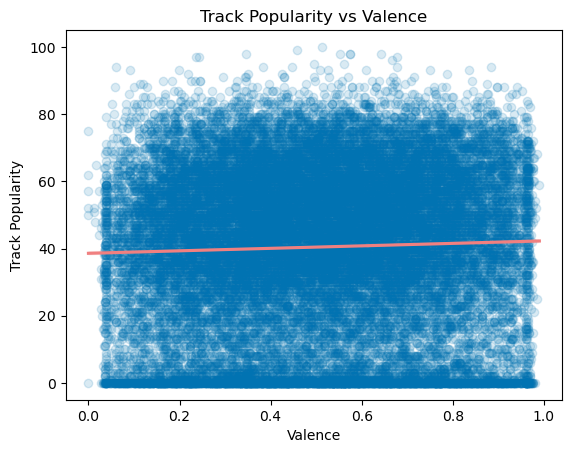

Slope of the trendline: 3.697, p-value < 0.05 is True


In [43]:
plt.figure()

sns.regplot(x='valence', y='track_popularity', data=df, 
            scatter_kws={'alpha':0.15}, line_kws={"color": "lightcoral"})
plt.title('Track Popularity vs Valence')
plt.xlabel('Valence')
plt.ylabel('Track Popularity')

plt.show()

x=df['valence'] 
y=df['track_popularity']

# the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope of the trendline: {slope.round(3)}, p-value < 0.05 is {p_value < 0.05}")

As valence increases, popularity increases only a little.

#### How does track popularity change by tempo?

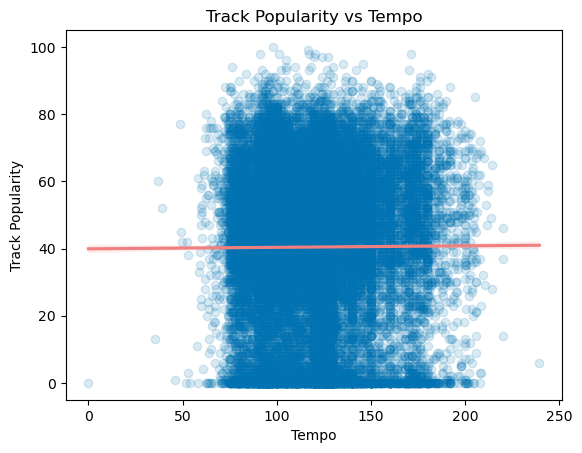

Slope of the trendline: 0.004, p-value < 0.05 is False


In [44]:
plt.figure()

sns.regplot(x='tempo', y='track_popularity', data=df, 
            scatter_kws={'alpha':0.15}, line_kws={"color": "lightcoral"})
plt.title('Track Popularity vs Tempo')
plt.xlabel('Tempo')
plt.ylabel('Track Popularity')

plt.show()

x=df['tempo'] 
y=df['track_popularity']

# the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope of the trendline: {slope.round(3)}, p-value < 0.05 is {p_value < 0.05}")

As tempo increase, track popularity nearly doesn't change at all.

#### How does track popularity change by duration?

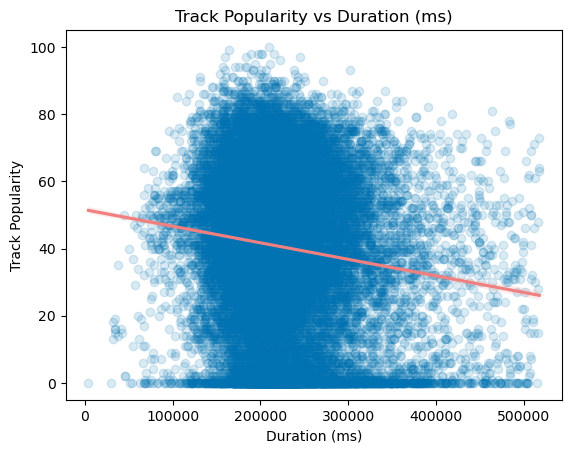

Slope of the trendline: -4.9e-05, p-value < 0.05 is True


In [45]:
plt.figure()

sns.regplot(x='duration_ms', y='track_popularity', data=df, 
            scatter_kws={'alpha':0.15}, line_kws={"color": "lightcoral"})
plt.title('Track Popularity vs Duration (ms)')
plt.xlabel('Duration (ms)')
plt.ylabel('Track Popularity')

plt.show()


x=df['duration_ms'] 
y=df['track_popularity']

# the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope of the trendline: {slope.round(6)}, p-value < 0.05 is {p_value < 0.05}")

As duration increase, popularity decrease drastically.

## Part 3 - Preprocessing

In [46]:
df1 = df.copy() # let's make a copy of the dataframe
df1.head()

track_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

                            track_artist  track_popularity  \
track_id                                                     
6f807x0ima9a1j3VPbc7VN        Ed Sheeran                66   
0r7CVbZTWZgbTCYdfa2P31          Maroon 5                67   
1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson                70   
75FpbthrwQmzHlBJLuGdC7  The Chainsmokers                60   
1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi                69   

                                track_album_id  \
track_id                                         
6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx   
0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6   
1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4   
75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6   
1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ   

                                                         track_album_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) [Loud Luxury...   
0r7CVbZTWZgbTCYdfa2P31                    Memories (Dillon Francis Remix)   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time (Don Diablo Remix)   
75FpbthrwQmzHlBJLuGdC7                        Call You Mine - The Remixes   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved (Future Humans Remix)   

                       playlist_name             playlist_id playlist_genre  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
0r7CVbZTWZgbTCYdfa2P31     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1z1Hg7Vb0AhHDiEmnDE79l     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
75FpbthrwQmzHlBJLuGdC7     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1e8PAfcKUYoKkxPhrHqw4x     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   

                       playlist_subgenre  danceability  key  loudness  mode  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN         dance pop         0.748    6    -2.634     1   
0r7CVbZTWZgbTCYdfa2P31         dance pop         0.726   11    -4.969     1   
1z1Hg7Vb0AhHDiEmnDE79l         dance pop         0.675    1    -3.432     0   
75FpbthrwQmzHlBJLuGdC7         dance pop         0.718    7    -3.778     1   
1e8PAfcKUYoKkxPhrHqw4x         dance pop         0.650    1    -4.672     1   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
6f807x0ima9a1j3VPbc7VN       0.0583        0.1020          0.000000    0.0653   
0r7CVbZTWZgbTCYdfa2P31       0.0373        0.0724          0.004210    0.3570   
1z1Hg7Vb0AhHDiEmnDE79l       0.0742        0.0794          0.000023    0.1100   
75FpbthrwQmzHlBJLuGdC7       0.1020        0.0287          0.000009    0.2040   
1e8PAfcKUYoKkxPhrHqw4x       0.0359        0.0803          0.000000    0.0833   

                        valence    tempo  duration_ms  album_month  \
track_id                                                             
6f807x0ima9a1j3VPbc7VN    0.518  122.036       194754            6   
0r7CVbZTWZgbTCYdfa2P31    0.693   99.972       162600           12   
1z1Hg7Vb0AhHDiEmnDE79l    0.613  124.008       176616            7   
75FpbthrwQmzHlBJLuGdC7    0.277  121.956       169093            7   
1e8PAfcKUYoKkxPhrHqw4x    0.725  123.976       189052            3   

                        album_

### Part 3.1 - Creating One-Hot Encoded Columns

#### `album_month`

In [47]:
df1['album_month'] = df1['album_month'].astype('str') #change the datatype to string otherwise mapping won't work

In [48]:
# create album_release_quarter column from album_month
df1['album_release_quarter'] = df1['album_month'].map({'1': '1', '2': '1', '3': '1',
                                                       '4': '2', '5': '2', '6': '2', 
                                                       '7': '3', '8': '3', '9': '3',
                                                       '10': '4', '11': '4', '12': '4',
                                                      })
df1.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_id',
       'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'album_month', 'album_decade',
       'album_release_quarter'],
      dtype='object')

In [49]:
df1.head()

track_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

                            track_artist  track_popularity  \
track_id                                                     
6f807x0ima9a1j3VPbc7VN        Ed Sheeran                66   
0r7CVbZTWZgbTCYdfa2P31          Maroon 5                67   
1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson                70   
75FpbthrwQmzHlBJLuGdC7  The Chainsmokers                60   
1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi                69   

                                track_album_id  \
track_id                                         
6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx   
0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6   
1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4   
75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6   
1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ   

                                                         track_album_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) [Loud Luxury...   
0r7CVbZTWZgbTCYdfa2P31                    Memories (Dillon Francis Remix)   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time (Don Diablo Remix)   
75FpbthrwQmzHlBJLuGdC7                        Call You Mine - The Remixes   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved (Future Humans Remix)   

                       playlist_name             playlist_id playlist_genre  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
0r7CVbZTWZgbTCYdfa2P31     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1z1Hg7Vb0AhHDiEmnDE79l     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
75FpbthrwQmzHlBJLuGdC7     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1e8PAfcKUYoKkxPhrHqw4x     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   

                       playlist_subgenre  danceability  key  loudness  mode  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN         dance pop         0.748    6    -2.634     1   
0r7CVbZTWZgbTCYdfa2P31         dance pop         0.726   11    -4.969     1   
1z1Hg7Vb0AhHDiEmnDE79l         dance pop         0.675    1    -3.432     0   
75FpbthrwQmzHlBJLuGdC7         dance pop         0.718    7    -3.778     1   
1e8PAfcKUYoKkxPhrHqw4x         dance pop         0.650    1    -4.672     1   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
6f807x0ima9a1j3VPbc7VN       0.0583        0.1020          0.000000    0.0653   
0r7CVbZTWZgbTCYdfa2P31       0.0373        0.0724          0.004210    0.3570   
1z1Hg7Vb0AhHDiEmnDE79l       0.0742        0.0794          0.000023    0.1100   
75FpbthrwQmzHlBJLuGdC7       0.1020        0.0287          0.000009    0.2040   
1e8PAfcKUYoKkxPhrHqw4x       0.0359        0.0803          0.000000    0.0833   

                        valence    tempo  duration_ms album_month  \
track_id                                                            
6f807x0ima9a1j3VPbc7VN    0.518  122.036       194754           6   
0r7CVbZTWZgbTCYdfa2P31    0.693   99.972       162600          12   
1z1Hg7Vb0AhHDiEmnDE79l    0.613  124.008       176616           7   
75FpbthrwQmzHlBJLuGdC7    0.277  121.956       169093           7   
1e8PAfcKUYoKkxPhrHqw4x    0.725  123.976       189052           3   

                        album_decade 

In [50]:
df1['album_release_quarter'].value_counts(normalize=True) #let's see which one is the least frequent

album_release_quarter
1    0.319417
4    0.271646
3    0.211293
2    0.197644
Name: proportion, dtype: float64

Since quarter2 is the least frequent, I will drop that one after I create the dummy variables.

In [51]:
# create dummy variables from album_release_quarter column
df1 = pd.get_dummies(df1, columns=['album_release_quarter'], dtype='int') 
df1.head()

track_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

                            track_artist  track_popularity  \
track_id                                                     
6f807x0ima9a1j3VPbc7VN        Ed Sheeran                66   
0r7CVbZTWZgbTCYdfa2P31          Maroon 5                67   
1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson                70   
75FpbthrwQmzHlBJLuGdC7  The Chainsmokers                60   
1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi                69   

                                track_album_id  \
track_id                                         
6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx   
0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6   
1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4   
75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6   
1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ   

                                                         track_album_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) [Loud Luxury...   
0r7CVbZTWZgbTCYdfa2P31                    Memories (Dillon Francis Remix)   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time (Don Diablo Remix)   
75FpbthrwQmzHlBJLuGdC7                        Call You Mine - The Remixes   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved (Future Humans Remix)   

                       playlist_name             playlist_id playlist_genre  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
0r7CVbZTWZgbTCYdfa2P31     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1z1Hg7Vb0AhHDiEmnDE79l     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
75FpbthrwQmzHlBJLuGdC7     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1e8PAfcKUYoKkxPhrHqw4x     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   

                       playlist_subgenre  danceability  key  loudness  mode  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN         dance pop         0.748    6    -2.634     1   
0r7CVbZTWZgbTCYdfa2P31         dance pop         0.726   11    -4.969     1   
1z1Hg7Vb0AhHDiEmnDE79l         dance pop         0.675    1    -3.432     0   
75FpbthrwQmzHlBJLuGdC7         dance pop         0.718    7    -3.778     1   
1e8PAfcKUYoKkxPhrHqw4x         dance pop         0.650    1    -4.672     1   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
6f807x0ima9a1j3VPbc7VN       0.0583        0.1020          0.000000    0.0653   
0r7CVbZTWZgbTCYdfa2P31       0.0373        0.0724          0.004210    0.3570   
1z1Hg7Vb0AhHDiEmnDE79l       0.0742        0.0794          0.000023    0.1100   
75FpbthrwQmzHlBJLuGdC7       0.1020        0.0287          0.000009    0.2040   
1e8PAfcKUYoKkxPhrHqw4x       0.0359        0.0803          0.000000    0.0833   

                        valence    tempo  duration_ms album_month  \
track_id                                                            
6f807x0ima9a1j3VPbc7VN    0.518  122.036       194754           6   
0r7CVbZTWZgbTCYdfa2P31    0.693   99.972       162600          12   
1z1Hg7Vb0AhHDiEmnDE79l    0.613  124.008       176616           7   
75FpbthrwQmzHlBJLuGdC7    0.277  121.956       169093           7   
1e8PAfcKUYoKkxPhrHqw4x    0.725  123.976       189052           3   

                        album_decade 

In [52]:
# drop album_release_quarter column
df1 = df1.drop(columns=['album_month', 'album_release_quarter_2'], axis=1)

df1.head()

track_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

                            track_artist  track_popularity  \
track_id                                                     
6f807x0ima9a1j3VPbc7VN        Ed Sheeran                66   
0r7CVbZTWZgbTCYdfa2P31          Maroon 5                67   
1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson                70   
75FpbthrwQmzHlBJLuGdC7  The Chainsmokers                60   
1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi                69   

                                track_album_id  \
track_id                                         
6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx   
0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6   
1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4   
75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6   
1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ   

                                                         track_album_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) [Loud Luxury...   
0r7CVbZTWZgbTCYdfa2P31                    Memories (Dillon Francis Remix)   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time (Don Diablo Remix)   
75FpbthrwQmzHlBJLuGdC7                        Call You Mine - The Remixes   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved (Future Humans Remix)   

                       playlist_name             playlist_id playlist_genre  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
0r7CVbZTWZgbTCYdfa2P31     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1z1Hg7Vb0AhHDiEmnDE79l     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
75FpbthrwQmzHlBJLuGdC7     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1e8PAfcKUYoKkxPhrHqw4x     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   

                       playlist_subgenre  danceability  key  loudness  mode  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN         dance pop         0.748    6    -2.634     1   
0r7CVbZTWZgbTCYdfa2P31         dance pop         0.726   11    -4.969     1   
1z1Hg7Vb0AhHDiEmnDE79l         dance pop         0.675    1    -3.432     0   
75FpbthrwQmzHlBJLuGdC7         dance pop         0.718    7    -3.778     1   
1e8PAfcKUYoKkxPhrHqw4x         dance pop         0.650    1    -4.672     1   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
6f807x0ima9a1j3VPbc7VN       0.0583        0.1020          0.000000    0.0653   
0r7CVbZTWZgbTCYdfa2P31       0.0373        0.0724          0.004210    0.3570   
1z1Hg7Vb0AhHDiEmnDE79l       0.0742        0.0794          0.000023    0.1100   
75FpbthrwQmzHlBJLuGdC7       0.1020        0.0287          0.000009    0.2040   
1e8PAfcKUYoKkxPhrHqw4x       0.0359        0.0803          0.000000    0.0833   

                        valence    tempo  duration_ms  album_decade  \
track_id                                                              
6f807x0ima9a1j3VPbc7VN    0.518  122.036       194754          2010   
0r7CVbZTWZgbTCYdfa2P31    0.693   99.972       162600          2010   
1z1Hg7Vb0AhHDiEmnDE79l    0.613  124.008       176616          2010   
75FpbthrwQmzHlBJLuGdC7    0.277  121.956       169093          2010   
1e8PAfcKUYoKkxPhrHqw4x    0.725  123.976       189052          2010   

                       

#### `album_decade`

In [53]:
df1['album_decade'] = df1['album_decade'].astype('str') # change the datatype to string otherwise mapping won't work

In [54]:
df1['album_decade'].value_counts(normalize=True) # let's see which one is the least frequent

album_decade
2010    0.713866
2000    0.124595
1990    0.069923
1980    0.036944
1970    0.026383
2020    0.023714
1960    0.004461
1950    0.000114
Name: proportion, dtype: float64

1950s is the least frequent decade in the data. I will drop that one, after I create the dummies.

In [55]:
# create dummy variables from album_decade column
df1 = pd.get_dummies(df1, columns=['album_decade'], dtype='int') 
df1.head()

track_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

                            track_artist  track_popularity  \
track_id                                                     
6f807x0ima9a1j3VPbc7VN        Ed Sheeran                66   
0r7CVbZTWZgbTCYdfa2P31          Maroon 5                67   
1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson                70   
75FpbthrwQmzHlBJLuGdC7  The Chainsmokers                60   
1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi                69   

                                track_album_id  \
track_id                                         
6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx   
0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6   
1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4   
75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6   
1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ   

                                                         track_album_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) [Loud Luxury...   
0r7CVbZTWZgbTCYdfa2P31                    Memories (Dillon Francis Remix)   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time (Don Diablo Remix)   
75FpbthrwQmzHlBJLuGdC7                        Call You Mine - The Remixes   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved (Future Humans Remix)   

                       playlist_name             playlist_id playlist_genre  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
0r7CVbZTWZgbTCYdfa2P31     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1z1Hg7Vb0AhHDiEmnDE79l     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
75FpbthrwQmzHlBJLuGdC7     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1e8PAfcKUYoKkxPhrHqw4x     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   

                       playlist_subgenre  danceability  key  loudness  mode  \
track_id                                                                      
6f807x0ima9a1j3VPbc7VN         dance pop         0.748    6    -2.634     1   
0r7CVbZTWZgbTCYdfa2P31         dance pop         0.726   11    -4.969     1   
1z1Hg7Vb0AhHDiEmnDE79l         dance pop         0.675    1    -3.432     0   
75FpbthrwQmzHlBJLuGdC7         dance pop         0.718    7    -3.778     1   
1e8PAfcKUYoKkxPhrHqw4x         dance pop         0.650    1    -4.672     1   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
6f807x0ima9a1j3VPbc7VN       0.0583        0.1020          0.000000    0.0653   
0r7CVbZTWZgbTCYdfa2P31       0.0373        0.0724          0.004210    0.3570   
1z1Hg7Vb0AhHDiEmnDE79l       0.0742        0.0794          0.000023    0.1100   
75FpbthrwQmzHlBJLuGdC7       0.1020        0.0287          0.000009    0.2040   
1e8PAfcKUYoKkxPhrHqw4x       0.0359        0.0803          0.000000    0.0833   

                        valence    tempo  duration_ms  \
track_id                                                
6f807x0ima9a1j3VPbc7VN    0.518  122.036       194754   
0r7CVbZTWZgbTCYdfa2P31    0.693   99.972       162600   
1z1Hg7Vb0AhHDiEmnDE79l    0.613  124.008       176616   
75FpbthrwQmzHlBJLuGdC7    0.277  121.956       169093   
1e8PAfcKUYoKkxPhrHqw4x    0.725  123.976       189052   

                        album_release_quarter_1  album_release_quarter_3  \
track_id                                     

In [56]:
df1 = df1.drop('album_decade_1950', axis=1) # drop album_decade_1950 column
df1.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_id',
       'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'album_release_quarter_1',
       'album_release_quarter_3', 'album_release_quarter_4',
       'album_decade_1960', 'album_decade_1970', 'album_decade_1980',
       'album_decade_1990', 'album_decade_2000', 'album_decade_2010',
       'album_decade_2020'],
      dtype='object')

#### `album_genre`

As I album_subgenre is more granular, I will use those to create dummy variables. To prevent multicolinearity, I drop `album_genre` column.

In [57]:
# drop the genre column
df1 = df1.drop('playlist_genre', axis=1)
df1.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_id',
       'track_album_name', 'playlist_name', 'playlist_id', 'playlist_subgenre',
       'danceability', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'album_release_quarter_1', 'album_release_quarter_3',
       'album_release_quarter_4', 'album_decade_1960', 'album_decade_1970',
       'album_decade_1980', 'album_decade_1990', 'album_decade_2000',
       'album_decade_2010', 'album_decade_2020'],
      dtype='object')

#### `album_subgenre`

In [58]:
df1['playlist_subgenre'].value_counts(normalize=True) #let's see which one is the least frequent

playlist_subgenre
southern hip hop             0.056884
indie poptimism              0.056083
neo soul                     0.053719
progressive electro house    0.053033
electro house                0.052385
hip hop                      0.048153
dance pop                    0.046857
gangster rap                 0.045751
trap                         0.044912
urban contemporary           0.043997
tropical                     0.043006
electropop                   0.041671
latin hip hop                0.041595
latin pop                    0.040337
hard rock                    0.039003
big room                     0.037058
album rock                   0.036868
post-teen pop                0.034771
permanent wave               0.034542
pop edm                      0.034161
classic rock                 0.033551
new jack swing               0.029814
hip pop                      0.029090
reggaeton                    0.022761
Name: proportion, dtype: float64

In [59]:
# create dummy variables from album_subgenre column
df1 = pd.get_dummies(df1, columns=['playlist_subgenre'], dtype='int')
df1.head()

track_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

                            track_artist  track_popularity  \
track_id                                                     
6f807x0ima9a1j3VPbc7VN        Ed Sheeran                66   
0r7CVbZTWZgbTCYdfa2P31          Maroon 5                67   
1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson                70   
75FpbthrwQmzHlBJLuGdC7  The Chainsmokers                60   
1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi                69   

                                track_album_id  \
track_id                                         
6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx   
0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6   
1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4   
75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6   
1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ   

                                                         track_album_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) [Loud Luxury...   
0r7CVbZTWZgbTCYdfa2P31                    Memories (Dillon Francis Remix)   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time (Don Diablo Remix)   
75FpbthrwQmzHlBJLuGdC7                        Call You Mine - The Remixes   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved (Future Humans Remix)   

                       playlist_name             playlist_id  danceability  \
track_id                                                                     
6f807x0ima9a1j3VPbc7VN     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.748   
0r7CVbZTWZgbTCYdfa2P31     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.726   
1z1Hg7Vb0AhHDiEmnDE79l     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.675   
75FpbthrwQmzHlBJLuGdC7     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.718   
1e8PAfcKUYoKkxPhrHqw4x     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.650   

                        key  loudness  mode  speechiness  acousticness  \
track_id                                                                 
6f807x0ima9a1j3VPbc7VN    6    -2.634     1       0.0583        0.1020   
0r7CVbZTWZgbTCYdfa2P31   11    -4.969     1       0.0373        0.0724   
1z1Hg7Vb0AhHDiEmnDE79l    1    -3.432     0       0.0742        0.0794   
75FpbthrwQmzHlBJLuGdC7    7    -3.778     1       0.1020        0.0287   
1e8PAfcKUYoKkxPhrHqw4x    1    -4.672     1       0.0359        0.0803   

                        instrumentalness  liveness  valence    tempo  \
track_id                                                               
6f807x0ima9a1j3VPbc7VN          0.000000    0.0653    0.518  122.036   
0r7CVbZTWZgbTCYdfa2P31          0.004210    0.3570    0.693   99.972   
1z1Hg7Vb0AhHDiEmnDE79l          0.000023    0.1100    0.613  124.008   
75FpbthrwQmzHlBJLuGdC7          0.000009    0.2040    0.277  121.956   
1e8PAfcKUYoKkxPhrHqw4x          0.000000    0.0833    0.725  123.976   

                        duration_ms  album_release_quarter_1  \
track_id                                                       
6f807x0ima9a1j3VPbc7VN       194754                        0   
0r7CVbZTWZgbTCYdfa2P31       162600                        0   
1z1Hg7Vb0AhHDiEmnDE79l       176616                        0   
75FpbthrwQmzHlBJLuGdC7       169093                        0   
1e8PAfcKUYoKkxPhrHqw4x       189052                        1   

                        album_release_quarter_3  album_release_quarter_4  \
track_id                                                                   
6f807x0ima9a1j3VPbc7VN   

In [60]:
df1 = df1.drop('playlist_subgenre_reggaeton', axis=1) # drop playlist_subgenre_reggaeton column
df1.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_id',
       'track_album_name', 'playlist_name', 'playlist_id', 'danceability',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'album_release_quarter_1', 'album_release_quarter_3',
       'album_release_quarter_4', 'album_decade_1960', 'album_decade_1970',
       'album_decade_1980', 'album_decade_1990', 'album_decade_2000',
       'album_decade_2010', 'album_decade_2020',
       'playlist_subgenre_album rock', 'playlist_subgenre_big room',
       'playlist_subgenre_classic rock', 'playlist_subgenre_dance pop',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_hip hop', 'playlist_subgenre_hip pop',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenr

#### `key`

In [61]:
df1['key'].value_counts(normalize=True) #let's see which one is the least frequent

key
1     0.120401
0     0.105990
7     0.102711
9     0.092912
11    0.091006
2     0.086736
5     0.081017
6     0.079416
8     0.073087
10    0.070228
4     0.068054
3     0.028442
Name: proportion, dtype: float64

In [62]:
# create dummy variables from key
df1 = pd.get_dummies(df1, columns=['key'], dtype='int')
df1.head()

track_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

                            track_artist  track_popularity  \
track_id                                                     
6f807x0ima9a1j3VPbc7VN        Ed Sheeran                66   
0r7CVbZTWZgbTCYdfa2P31          Maroon 5                67   
1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson                70   
75FpbthrwQmzHlBJLuGdC7  The Chainsmokers                60   
1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi                69   

                                track_album_id  \
track_id                                         
6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx   
0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6   
1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4   
75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6   
1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ   

                                                         track_album_name  \
track_id                                                                    
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) [Loud Luxury...   
0r7CVbZTWZgbTCYdfa2P31                    Memories (Dillon Francis Remix)   
1z1Hg7Vb0AhHDiEmnDE79l                    All the Time (Don Diablo Remix)   
75FpbthrwQmzHlBJLuGdC7                        Call You Mine - The Remixes   
1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved (Future Humans Remix)   

                       playlist_name             playlist_id  danceability  \
track_id                                                                     
6f807x0ima9a1j3VPbc7VN     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.748   
0r7CVbZTWZgbTCYdfa2P31     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.726   
1z1Hg7Vb0AhHDiEmnDE79l     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.675   
75FpbthrwQmzHlBJLuGdC7     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.718   
1e8PAfcKUYoKkxPhrHqw4x     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.650   

                        loudness  mode  speechiness  acousticness  \
track_id                                                            
6f807x0ima9a1j3VPbc7VN    -2.634     1       0.0583        0.1020   
0r7CVbZTWZgbTCYdfa2P31    -4.969     1       0.0373        0.0724   
1z1Hg7Vb0AhHDiEmnDE79l    -3.432     0       0.0742        0.0794   
75FpbthrwQmzHlBJLuGdC7    -3.778     1       0.1020        0.0287   
1e8PAfcKUYoKkxPhrHqw4x    -4.672     1       0.0359        0.0803   

                        instrumentalness  liveness  valence    tempo  \
track_id                                                               
6f807x0ima9a1j3VPbc7VN          0.000000    0.0653    0.518  122.036   
0r7CVbZTWZgbTCYdfa2P31          0.004210    0.3570    0.693   99.972   
1z1Hg7Vb0AhHDiEmnDE79l          0.000023    0.1100    0.613  124.008   
75FpbthrwQmzHlBJLuGdC7          0.000009    0.2040    0.277  121.956   
1e8PAfcKUYoKkxPhrHqw4x          0.000000    0.0833    0.725  123.976   

                        duration_ms  album_release_quarter_1  \
track_id                                                       
6f807x0ima9a1j3VPbc7VN       194754                        0   
0r7CVbZTWZgbTCYdfa2P31       162600                        0   
1z1Hg7Vb0AhHDiEmnDE79l       176616                        0   
75FpbthrwQmzHlBJLuGdC7       169093                        0   
1e8PAfcKUYoKkxPhrHqw4x       189052                        1   

                        album_release_quarter_3  album_release_quarter_4  \
track_id                                                                   
6f807x0ima9a1j3VPbc7VN                        0             

In [63]:
df1 = df1.drop('key_3', axis=1) # drop key_3 column
df1.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_id',
       'track_album_name', 'playlist_name', 'playlist_id', 'danceability',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms',
       'album_release_quarter_1', 'album_release_quarter_3',
       'album_release_quarter_4', 'album_decade_1960', 'album_decade_1970',
       'album_decade_1980', 'album_decade_1990', 'album_decade_2000',
       'album_decade_2010', 'album_decade_2020',
       'playlist_subgenre_album rock', 'playlist_subgenre_big room',
       'playlist_subgenre_classic rock', 'playlist_subgenre_dance pop',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_hip hop', 'playlist_subgenre_hip pop',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenre_latin

#### Dropping other columns
We cannot create dummy variables for the following categorical columns since each one has a high number of unique categories in them: `track_name`, `track_artist`, `track_album_id`, `track_album_name`, `playlist_name`, `playlist_id`. Below, I show the unique number of categories in each one, and drop them. 

In [64]:
cols = ['track_name', 'track_artist', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id']

for col in cols:
    print(f'There are {df[col].nunique()} categories in {col} column.')

There are 23449 categories in track_name column.
There are 10692 categories in track_artist column.
There are 21177 categories in track_album_id column.
There are 19037 categories in track_album_name column.
There are 448 categories in playlist_name column.
There are 470 categories in playlist_id column.


In [65]:
df1 = df1.drop(columns=cols) # drop the columns in cols list above
df1.columns

Index(['track_popularity', 'danceability', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'album_release_quarter_1', 'album_release_quarter_3',
       'album_release_quarter_4', 'album_decade_1960', 'album_decade_1970',
       'album_decade_1980', 'album_decade_1990', 'album_decade_2000',
       'album_decade_2010', 'album_decade_2020',
       'playlist_subgenre_album rock', 'playlist_subgenre_big room',
       'playlist_subgenre_classic rock', 'playlist_subgenre_dance pop',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_hip hop', 'playlist_subgenre_hip pop',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenre_latin pop', 'playlist_subgenre_neo soul',
       'playlist_subgenre_new jack swing', 'playlist_subgenre_permanent wave'

#### Optimizing the Data Size

Let's check the datatypes and optimize their size for storing data and running models.

In [66]:
df1.dtypes

track_popularity                                 int64
danceability                                   float64
loudness                                       float64
mode                                             int64
speechiness                                    float64
acousticness                                   float64
instrumentalness                               float64
liveness                                       float64
valence                                        float64
tempo                                          float64
duration_ms                                      int64
album_release_quarter_1                          int64
album_release_quarter_3                          int64
album_release_quarter_4                          int64
album_decade_1960                                int64
album_decade_1970                                int64
album_decade_1980                                int64
album_decade_1990                                int64
album_deca

All of them are stored as 64-bit integer or float data. This is not optimal. Let's change that. To begin with, binary columns can be as small as int8.

In [67]:
# create a list of the binary columns
bin_columns = ['album_release_quarter_1', 'album_release_quarter_3',
       'album_release_quarter_4', 'album_decade_1960', 'album_decade_1970',
       'album_decade_1980', 'album_decade_1990', 'album_decade_2000',
       'album_decade_2010', 'album_decade_2020',
       'playlist_subgenre_album rock', 'playlist_subgenre_big room',
       'playlist_subgenre_classic rock', 'playlist_subgenre_dance pop',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_hip hop', 'playlist_subgenre_hip pop',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenre_latin pop', 'playlist_subgenre_neo soul',
       'playlist_subgenre_new jack swing', 'playlist_subgenre_permanent wave',
       'playlist_subgenre_pop edm', 'playlist_subgenre_post-teen pop',
       'playlist_subgenre_progressive electro house',
       'playlist_subgenre_southern hip hop', 'playlist_subgenre_trap',
       'playlist_subgenre_tropical', 'playlist_subgenre_urban contemporary',
       'key_0', 'key_1', 'key_2', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'mode']

In [68]:
# change the datatype of each binary column to uint8
for col in bin_columns:
    df1[col] = df1[col].astype('uint8')

In [69]:
# create a list of the non-binary columns
non_bin_cols = ['track_popularity', 'danceability', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

for col in non_bin_cols:
    print(f'Values in {col} column range from {df1[col].min()} to {df1[col].max()}.')

Values in track_popularity column range from 0 to 100.
Values in danceability column range from 0.0 to 0.983.
Values in loudness column range from -46.448 to 1.275.
Values in speechiness column range from 0.0 to 0.918.
Values in acousticness column range from 0.0 to 0.994.
Values in instrumentalness column range from 0.0 to 0.994.
Values in liveness column range from 0.0 to 0.996.
Values in valence column range from 0.0 to 0.99.
Values in tempo column range from 0.0 to 239.44.
Values in duration_ms column range from 4000 to 517810.


In [70]:
# for track_popularity uint8 is enough, so let's change that
df1['track_popularity'] = df1['track_popularity'].astype('uint8')
df1['track_popularity'].dtype

dtype('uint8')

In [71]:
# create a sub-list for the float data
float_cols = ['danceability', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# change their datatype to float32
for col in float_cols:
    df1[col] = df1[col].astype('float32')

In [72]:
# for duration_ms uint32 is enough, so let's change that
df1['duration_ms'] = df1['duration_ms'].astype('uint32')
df1['duration_ms'].dtype

dtype('uint32')

In [73]:
df1.dtypes

track_popularity                                 uint8
danceability                                   float32
loudness                                       float32
mode                                             uint8
speechiness                                    float32
acousticness                                   float32
instrumentalness                               float32
liveness                                       float32
valence                                        float32
tempo                                          float32
duration_ms                                     uint32
album_release_quarter_1                          uint8
album_release_quarter_3                          uint8
album_release_quarter_4                          uint8
album_decade_1960                                uint8
album_decade_1970                                uint8
album_decade_1980                                uint8
album_decade_1990                                uint8
album_deca

### Part 3.2 - Correlations

In [74]:
df1_corrs = df1.corr() # get the correlations
 
mask = np.triu(df1_corrs) # get the mask for better readability

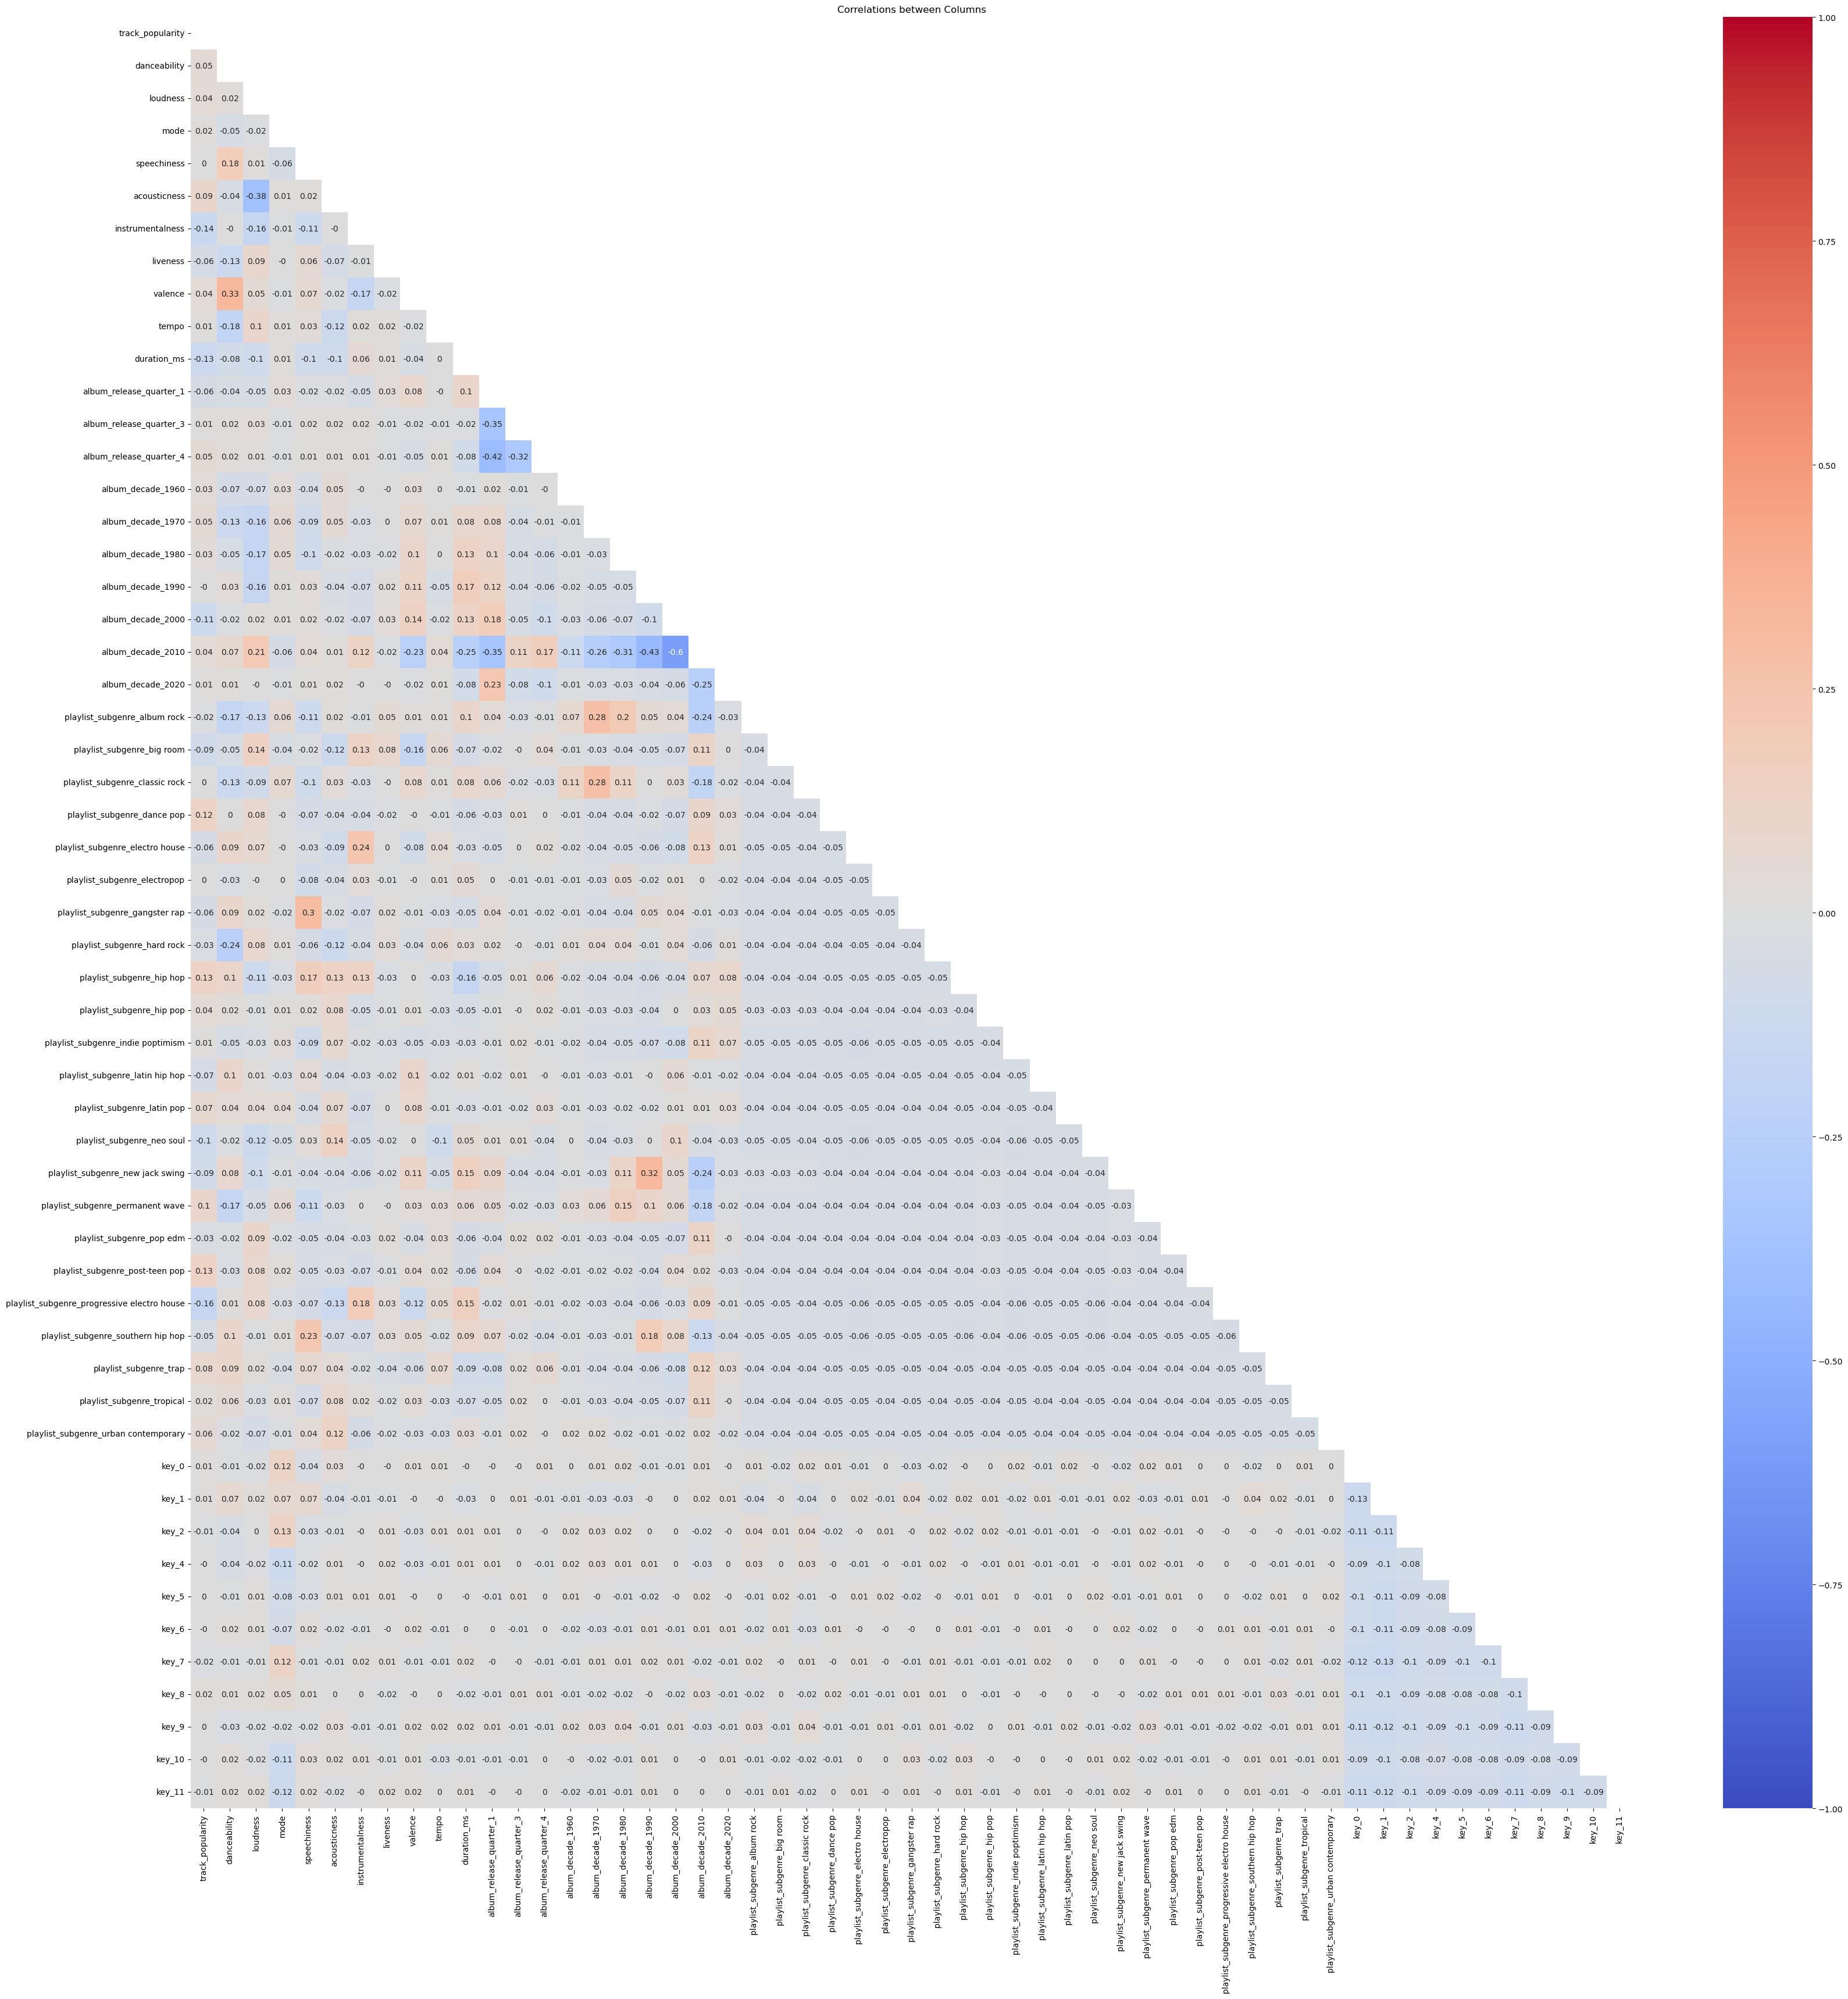

In [75]:
# visualize the correlations with a heatmap

plt.figure(figsize=(40,40))
plt.title('Correlations between Columns')
sns.heatmap(df1_corrs.round(2), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Too many! Let's focus on the ones above 0.2 or below -0.2.

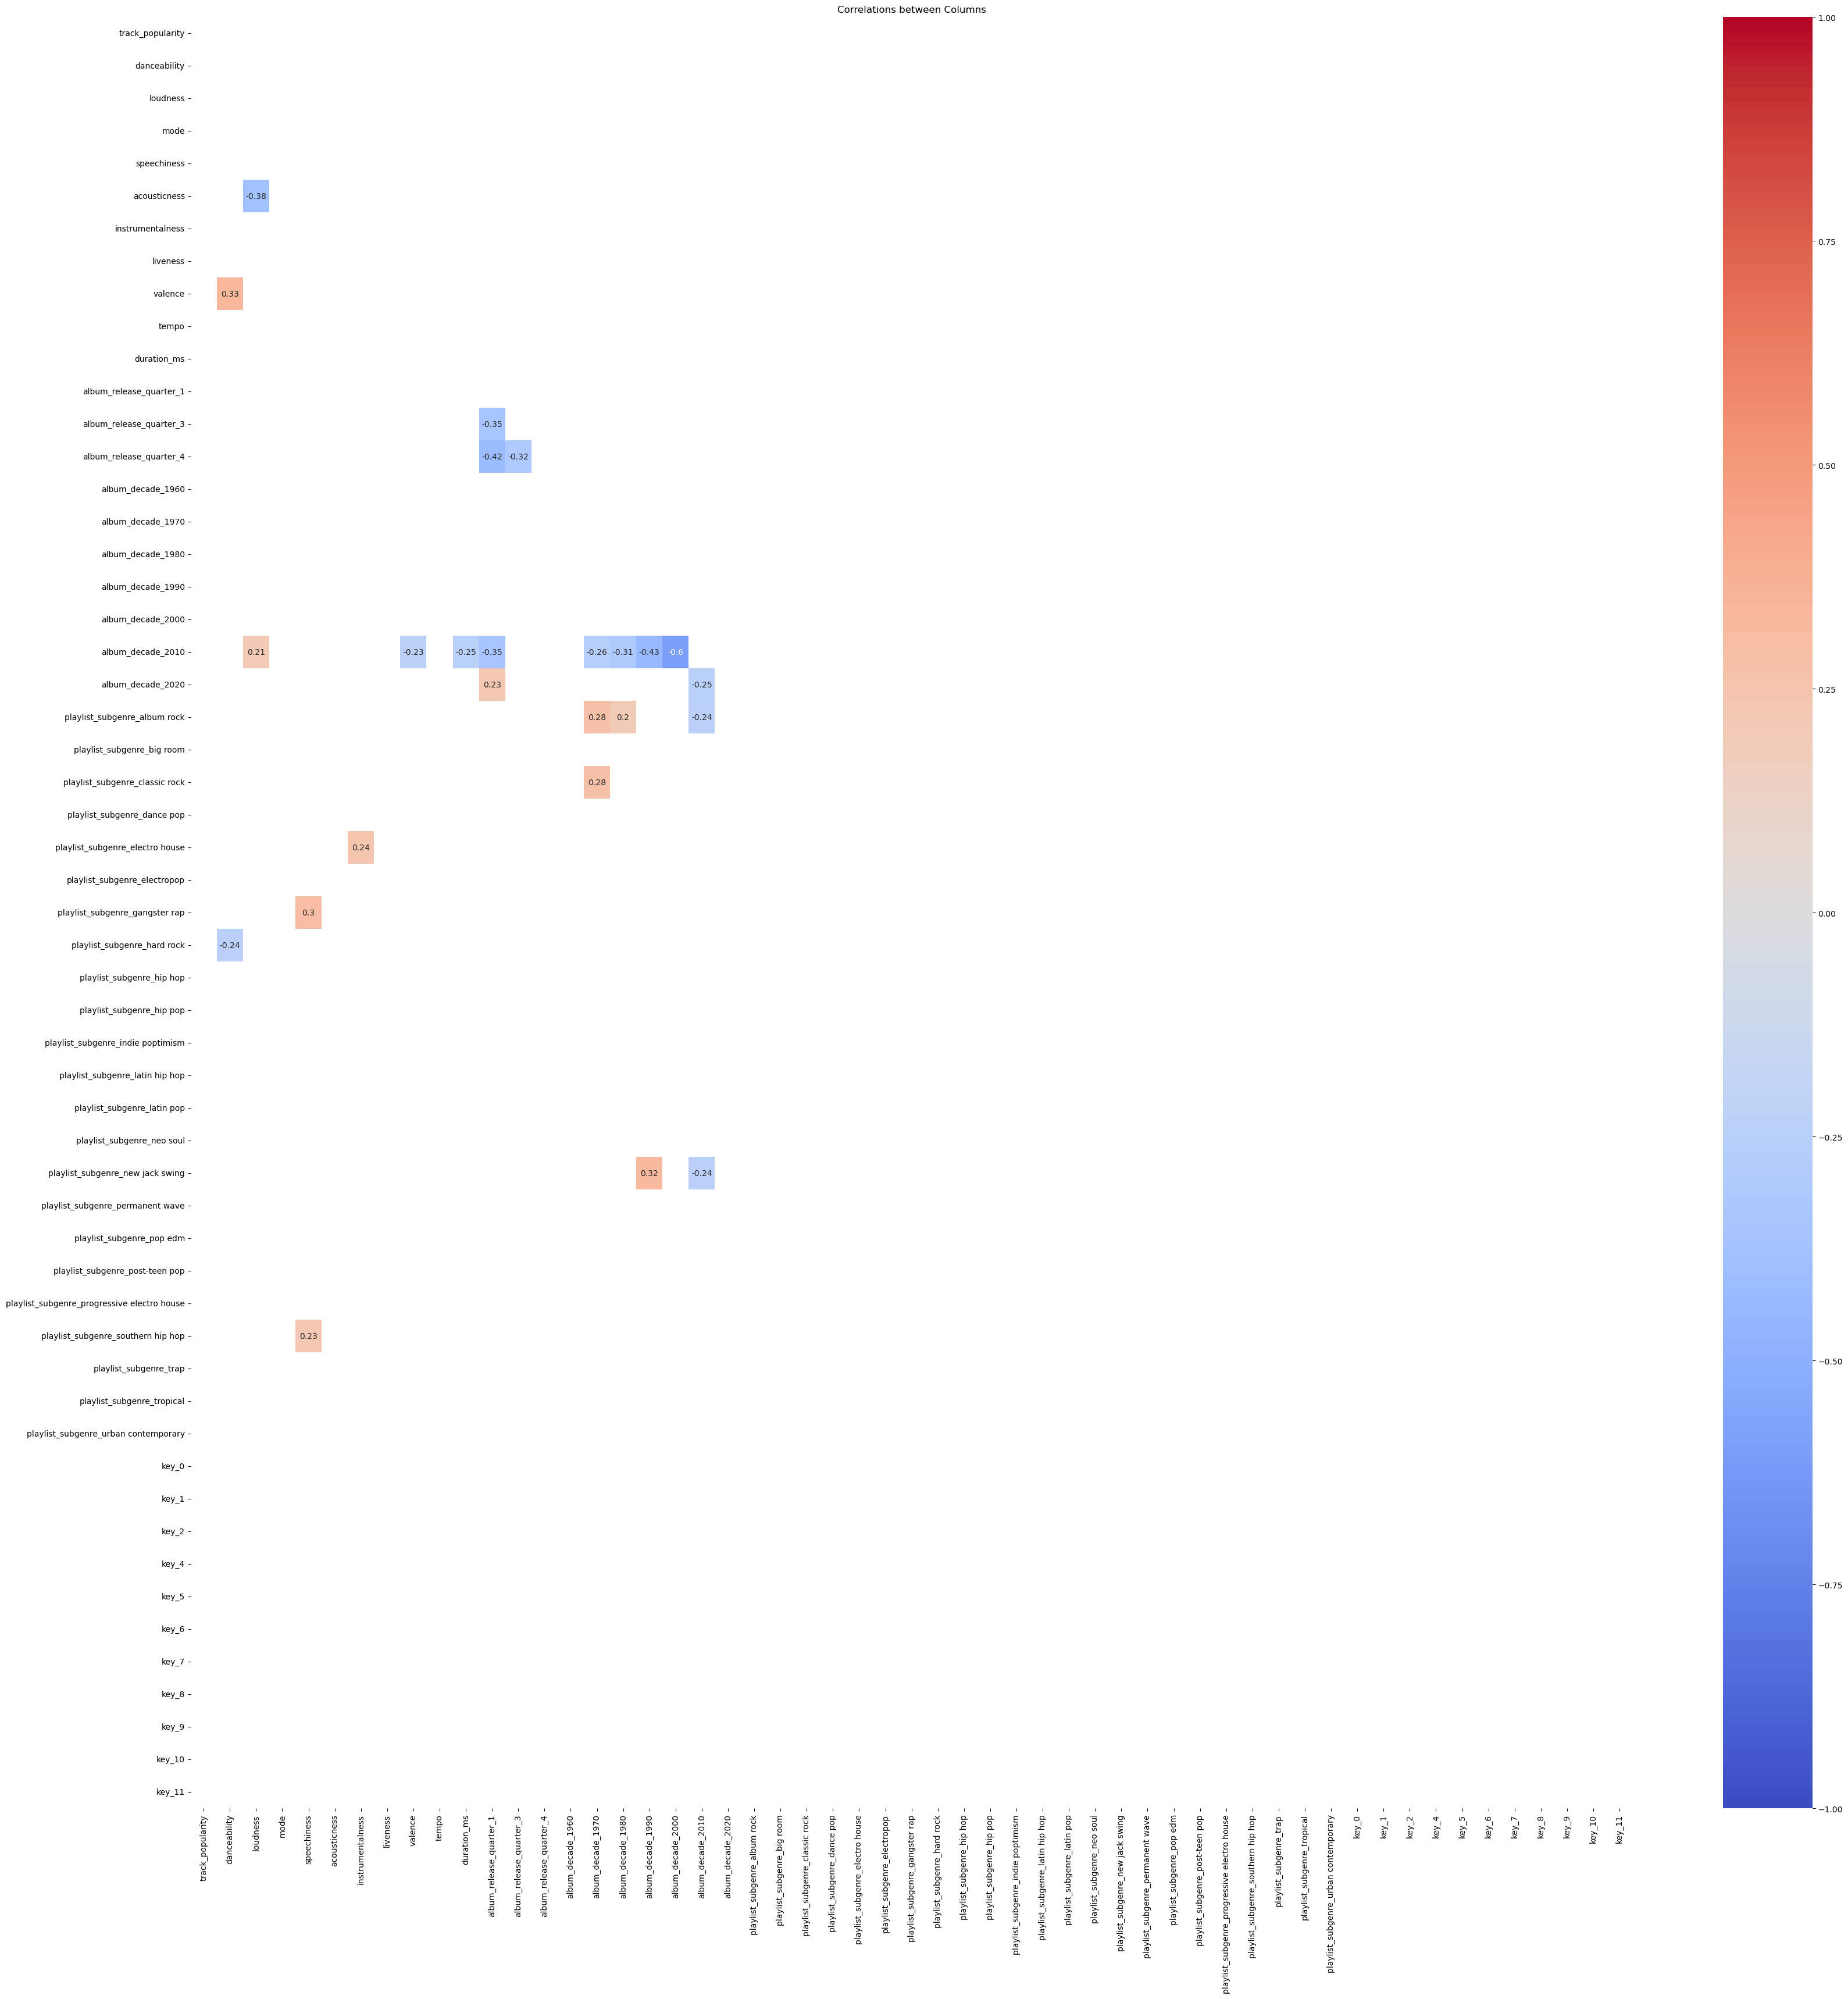

In [76]:
# visualize the correlations with a heatmap

plt.figure(figsize=(40,40))
plt.title('Correlations between Columns')
sns.heatmap(df1_corrs[(df1_corrs >=0.2) | (df1_corrs <= -0.2)].round(2), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Good news is multicolinearity is not a concern since correlations between independent variables are mostly very low and the highest correlation has a coefficient of -0.6.

Bad news is none of the correlation coefficients between the independent variables and the target variable, track popularity, is higher than 0.2 or lower than -0.2.

**What if we filter out the zero popularity scores?** Recall that there were a lot of zero popularity scores.

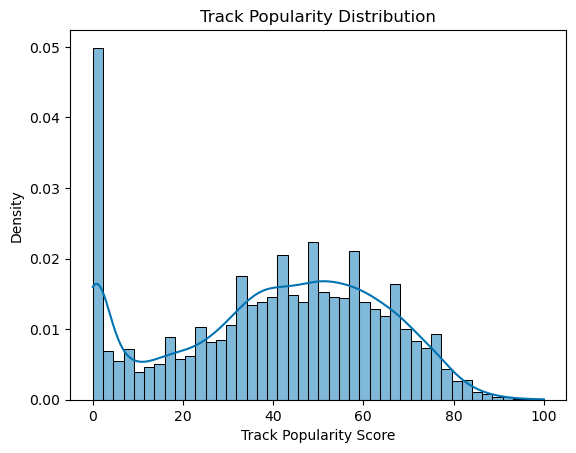

In [77]:
plt.figure()
sns.histplot(df['track_popularity'], kde=True, stat='density')
plt.title('Track Popularity Distribution')
plt.xlabel('Track Popularity Score')
plt.show()

In [78]:
df_zero = df1[df1['track_popularity']==0] # filter for zero scores in track popularity
df_zero.shape

(2264, 55)

There are 2264 tracks that has a popularity score of zero.

In [79]:
df1.shape

(26229, 55)

In [80]:
df2 = df1[df1['track_popularity'] != 0] # filter out zero scores
df2.shape

(23965, 55)

Let's check the correlations again.

In [81]:
df2_corrs = df2.corr() # get the correlations
 
mask = np.triu(df2_corrs) # get the mask for better readability

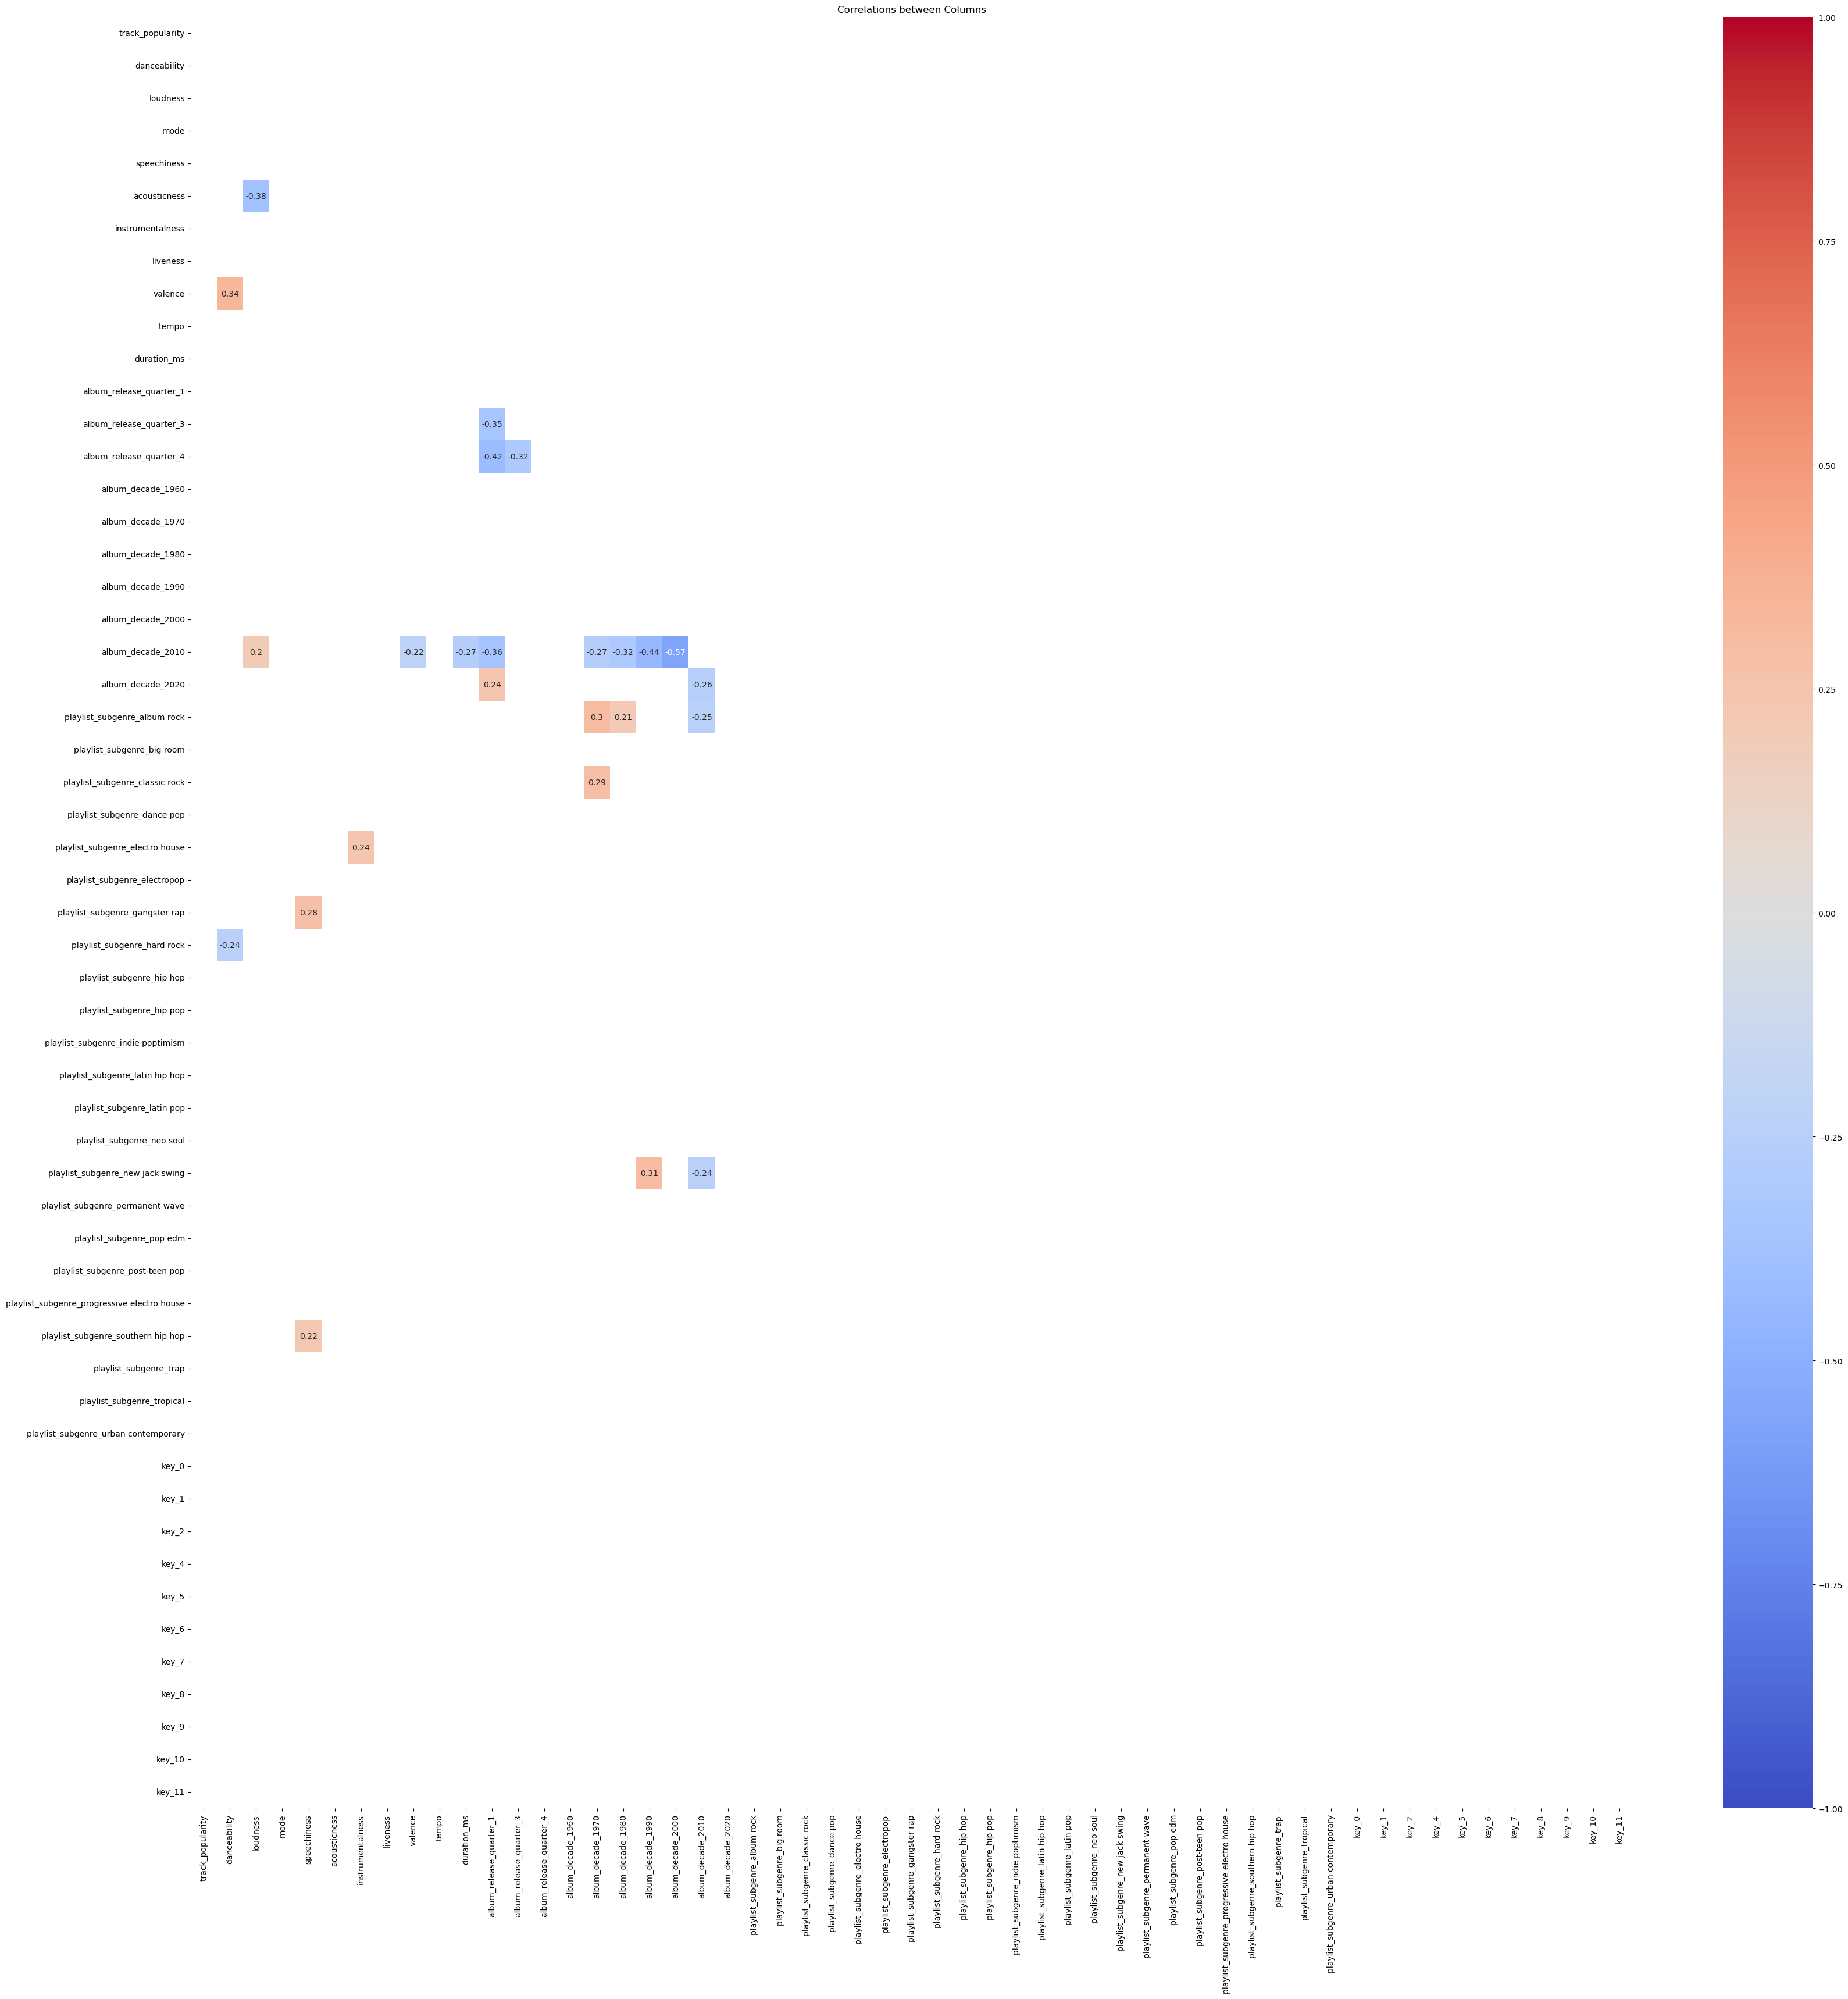

In [82]:
# visualize the correlations with a heatmap

plt.figure(figsize=(40,40))
plt.title('Correlations between Columns')
sns.heatmap(df2_corrs[(df2_corrs >=0.2) | (df2_corrs <= -0.2)].round(2), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

We still don't have any correlations with a magnitude above 0.2 with the target variable. Let's move on to modeling and see what we get as baseline. 

### Part 3.3 - Log Transformation of Right Skewed Columns

As I mentioned earlier, the numeric columns - speechiness, acousticness, instrumentalness, and liveness - are right-skewed, and log-transforming them is a good idea.

In [84]:
df3 = df1.copy() # make a copy of the dataframe df1

In [85]:
# Apply log transformation only to positive values
df3['log_speechiness'] = np.log1p(df3['speechiness'])
df3['log_acousticness'] = np.log1p(df3['acousticness'])
df3['log_instrumentalness'] = np.log1p(df3['instrumentalness'])
df3['log_liveness'] = np.log1p(df3['liveness'])

In [86]:
df3.head()

track_popularity  danceability  loudness  mode  \
track_id                                                                 
6f807x0ima9a1j3VPbc7VN                66         0.748    -2.634     1   
0r7CVbZTWZgbTCYdfa2P31                67         0.726    -4.969     1   
1z1Hg7Vb0AhHDiEmnDE79l                70         0.675    -3.432     0   
75FpbthrwQmzHlBJLuGdC7                60         0.718    -3.778     1   
1e8PAfcKUYoKkxPhrHqw4x                69         0.650    -4.672     1   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
6f807x0ima9a1j3VPbc7VN       0.0583        0.1020          0.000000    0.0653   
0r7CVbZTWZgbTCYdfa2P31       0.0373        0.0724          0.004210    0.3570   
1z1Hg7Vb0AhHDiEmnDE79l       0.0742        0.0794          0.000023    0.1100   
75FpbthrwQmzHlBJLuGdC7       0.1020        0.0287          0.000009    0.2040   
1e8PAfcKUYoKkxPhrHqw4x       0.0359        0.0803          0.000000    0.0833   

                        valence       tempo  duration_ms  \
track_id                                                   
6f807x0ima9a1j3VPbc7VN    0.518  122.036003       194754   
0r7CVbZTWZgbTCYdfa2P31    0.693   99.972000       162600   
1z1Hg7Vb0AhHDiEmnDE79l    0.613  124.008003       176616   
75FpbthrwQmzHlBJLuGdC7    0.277  121.956001       169093   
1e8PAfcKUYoKkxPhrHqw4x    0.725  123.975998       189052   

                        album_release_quarter_1  album_release_quarter_3  \
track_id                                                                   
6f807x0ima9a1j3VPbc7VN                        0                        0   
0r7CVbZTWZgbTCYdfa2P31                        0                        0   
1z1Hg7Vb0AhHDiEmnDE79l                        0                        1   
75FpbthrwQmzHlBJLuGdC7                        0                        1   
1e8PAfcKUYoKkxPhrHqw4x                        1                        0   

                        album_release_quarter_4  album_decade_1960  \
track_id                                                             
6f807x0ima9a1j3VPbc7VN                        0                  0   
0r7CVbZTWZgbTCYdfa2P31                        1                  0   
1z1Hg7Vb0AhHDiEmnDE79l                        0                  0   
75FpbthrwQmzHlBJLuGdC7                        0                  0   
1e8PAfcKUYoKkxPhrHqw4x                        0                  0   

                        album_decade_1970  album_decade_1980  \
track_id                                                       
6f807x0ima9a1j3VPbc7VN                  0                  0   
0r7CVbZTWZgbTCYdfa2P31                  0                  0   
1z1Hg7Vb0AhHDiEmnDE79l                  0                  0   
75FpbthrwQmzHlBJLuGdC7                  0                  0   
1e8PAfcKUYoKkxPhrHqw4x                  0                  0   

                        album_decade_1990  album_decade_2000  \
track_id                                                       
6f807x0ima9a1j3VPbc7VN                  0                  0   
0r7CVbZTWZgbTCYdfa2P31                  0                  0   
1z1Hg7Vb0AhHDiEmnDE79l                  0                  0   
75FpbthrwQmzHlBJLuGdC7                  0                  0   
1e8PAfcKUYoKkxPhrHqw4x                  0                  0   

                        album_decade_2010  album_decade_2020  \
track_id                                                       
6f807x0ima9a1j3VPbc7VN                  1                  0   
0r7CVbZTWZgbTCYdfa2P31                  1                  0   
1z1Hg7Vb0AhHDiEmnDE79l                  1                  0   
75FpbthrwQmzHlBJLuGdC7                  1                  0   
1e8PAfcKUYoKkxPhrHqw4x                  1                  0   

                        playlist_subgenre_album rock  \
track_id                                               
6f807x0ima9a1j3VPbc7VN           

In [87]:
df1.head()

track_popularity  danceability  loudness  mode  \
track_id                                                                 
6f807x0ima9a1j3VPbc7VN                66         0.748    -2.634     1   
0r7CVbZTWZgbTCYdfa2P31                67         0.726    -4.969     1   
1z1Hg7Vb0AhHDiEmnDE79l                70         0.675    -3.432     0   
75FpbthrwQmzHlBJLuGdC7                60         0.718    -3.778     1   
1e8PAfcKUYoKkxPhrHqw4x                69         0.650    -4.672     1   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
6f807x0ima9a1j3VPbc7VN       0.0583        0.1020          0.000000    0.0653   
0r7CVbZTWZgbTCYdfa2P31       0.0373        0.0724          0.004210    0.3570   
1z1Hg7Vb0AhHDiEmnDE79l       0.0742        0.0794          0.000023    0.1100   
75FpbthrwQmzHlBJLuGdC7       0.1020        0.0287          0.000009    0.2040   
1e8PAfcKUYoKkxPhrHqw4x       0.0359        0.0803          0.000000    0.0833   

                        valence       tempo  duration_ms  \
track_id                                                   
6f807x0ima9a1j3VPbc7VN    0.518  122.036003       194754   
0r7CVbZTWZgbTCYdfa2P31    0.693   99.972000       162600   
1z1Hg7Vb0AhHDiEmnDE79l    0.613  124.008003       176616   
75FpbthrwQmzHlBJLuGdC7    0.277  121.956001       169093   
1e8PAfcKUYoKkxPhrHqw4x    0.725  123.975998       189052   

                        album_release_quarter_1  album_release_quarter_3  \
track_id                                                                   
6f807x0ima9a1j3VPbc7VN                        0                        0   
0r7CVbZTWZgbTCYdfa2P31                        0                        0   
1z1Hg7Vb0AhHDiEmnDE79l                        0                        1   
75FpbthrwQmzHlBJLuGdC7                        0                        1   
1e8PAfcKUYoKkxPhrHqw4x                        1                        0   

                        album_release_quarter_4  album_decade_1960  \
track_id                                                             
6f807x0ima9a1j3VPbc7VN                        0                  0   
0r7CVbZTWZgbTCYdfa2P31                        1                  0   
1z1Hg7Vb0AhHDiEmnDE79l                        0                  0   
75FpbthrwQmzHlBJLuGdC7                        0                  0   
1e8PAfcKUYoKkxPhrHqw4x                        0                  0   

                        album_decade_1970  album_decade_1980  \
track_id                                                       
6f807x0ima9a1j3VPbc7VN                  0                  0   
0r7CVbZTWZgbTCYdfa2P31                  0                  0   
1z1Hg7Vb0AhHDiEmnDE79l                  0                  0   
75FpbthrwQmzHlBJLuGdC7                  0                  0   
1e8PAfcKUYoKkxPhrHqw4x                  0                  0   

                        album_decade_1990  album_decade_2000  \
track_id                                                       
6f807x0ima9a1j3VPbc7VN                  0                  0   
0r7CVbZTWZgbTCYdfa2P31                  0                  0   
1z1Hg7Vb0AhHDiEmnDE79l                  0                  0   
75FpbthrwQmzHlBJLuGdC7                  0                  0   
1e8PAfcKUYoKkxPhrHqw4x                  0                  0   

                        album_decade_2010  album_decade_2020  \
track_id                                                       
6f807x0ima9a1j3VPbc7VN                  1                  0   
0r7CVbZTWZgbTCYdfa2P31                  1                  0   
1z1Hg7Vb0AhHDiEmnDE79l                  1                  0   
75FpbthrwQmzHlBJLuGdC7                  1                  0   
1e8PAfcKUYoKkxPhrHqw4x                  1                  0   

                        playlist_subgenre_album rock  \
track_id                                               
6f807x0ima9a1j3VPbc7VN           

They changed very minimally. Let's visualize them.

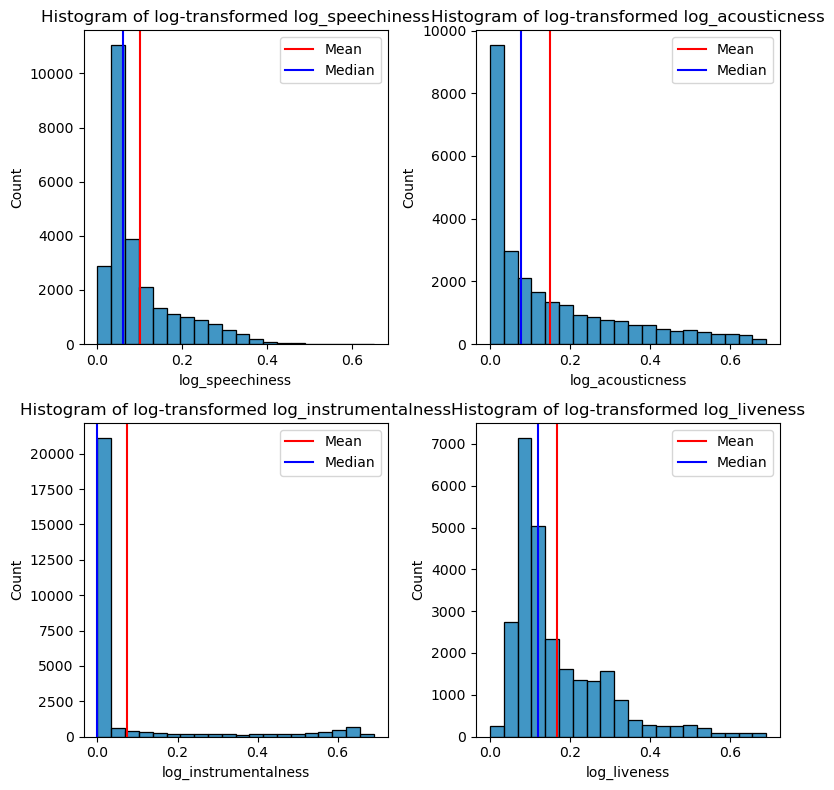

In [89]:
right_skw_cols = ['log_speechiness', 'log_acousticness', 'log_instrumentalness', 'log_liveness']

# create histograms for the log-transformed columns
plt.subplots(2,2, figsize=(8,8))

for i, col in enumerate(right_skw_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df3[col], bins=20)
    plt.axvline(df3[col].mean(), label="Mean", color='red')
    plt.axvline(df3[col].median(), label="Median", color='blue')
    plt.title(f'Histogram of log-transformed {col}')
    plt.legend()
    
plt.tight_layout()
plt.show()

The change is very minimal. Instead of log1p, which adds 1, I will do just log but by adding a very small constant to eliminate 0 values.

In [90]:
# define a small constant value
epsilon = 1e-10

# apply log transformation
df3['log_speechiness'] = np.log(df3['speechiness'] + epsilon)
df3['log_acousticness'] = np.log(df3['acousticness'] + epsilon)
df3['log_instrumentalness'] = np.log(df3['instrumentalness'] + epsilon)
df3['log_liveness'] = np.log(df3['liveness'] + epsilon)

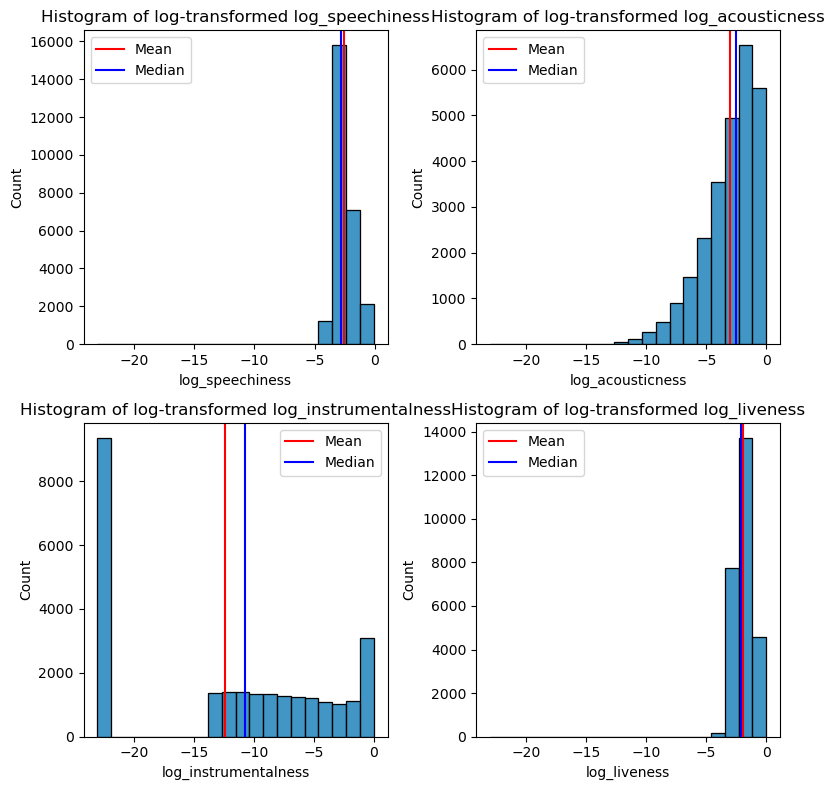

In [91]:
log_cols = ['log_speechiness', 'log_acousticness', 'log_instrumentalness', 'log_liveness']

# create histograms for the log-transformed columns
plt.subplots(2,2, figsize=(8,8))

for i, col in enumerate(log_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df3[col], bins=20)
    plt.axvline(df3[col].mean(), label="Mean", color='red')
    plt.axvline(df3[col].median(), label="Median", color='blue')
    plt.title(f'Histogram of log-transformed {col}')
    plt.legend()
    
plt.tight_layout()
plt.show()

In [93]:
df3.drop(columns=['speechiness', 'acousticness', 'instrumentalness', 'liveness'])
df3.columns

Index(['track_popularity', 'danceability', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'album_release_quarter_1', 'album_release_quarter_3',
       'album_release_quarter_4', 'album_decade_1960', 'album_decade_1970',
       'album_decade_1980', 'album_decade_1990', 'album_decade_2000',
       'album_decade_2010', 'album_decade_2020',
       'playlist_subgenre_album rock', 'playlist_subgenre_big room',
       'playlist_subgenre_classic rock', 'playlist_subgenre_dance pop',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_hip hop', 'playlist_subgenre_hip pop',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenre_latin pop', 'playlist_subgenre_neo soul',
       'playlist_subgenre_new jack swing', 'playlist_subgenre_permanent wave'

### Part 3.4 - Creating Test and Train Splits

Let's separate the independent variables and the dependent variable.

In [94]:
X = df3.iloc[:, 1:] # all the columns except for the target column that is the first one
y = df3['track_popularity'] # the target column

Let's split it into test and train sets.

In [95]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [96]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20983, 58) (20983,) (5246, 58) (5246,)


## Part 4 - Baseline Modeling

### Linear Regression Model 1

In [97]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tempfile import mkdtemp
from sklearn.metrics import mean_absolute_error, r2_score

I need to add a scalar for the non-binary numeric columns in the pipeline. Loudness column has negative values as well. So I will use Standard Scaler on that one, and MinMax scaler on the others. The one-hot encoded columns will not be scaled.

Let's create the pipeline and do a grid search for finding the best linear regression model (both Lasso and Ridge) with the best parameters.

In [98]:
# Define the columns for MinMaxScaler and StandardScaler
minmax_cols = ['danceability', 'valence', 'tempo', 'duration_ms']
standard_cols = ['loudness', 'log_speechiness', 'log_acousticness', 'log_instrumentalness', 'log_liveness']

# Create a ColumnTransformer to apply different scalers to different columns
scaler = ColumnTransformer([
    ('minmax_scaler', MinMaxScaler(), minmax_cols),
    ('standard_scaler', StandardScaler(), standard_cols)
], remainder='passthrough')  # Leave other columns unchanged

# Define the pipeline with estimators
estimators = [
    ('scaling', scaler),
    ('dimred', PCA()),  # Dimensionality reduction using PCA
    ('model', Lasso())  # Lasso linear regression
]

# Create the pipeline
pipe = Pipeline(estimators)

# Caching for the pipeline
cachedir = mkdtemp()
cached_pipe = Pipeline(estimators, memory=cachedir)

# Define parameter distributions
param_grid = [
    {
        'dimred__n_components': [0.9, None],  # Percentage of variance or None for no reduction
        'model': [Lasso()],  # Lasso regression
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Example values for Lasso alpha
    },
    {
        'dimred__n_components': [0.9, None],  # Percentage of variance or None for no reduction
        'model': [Ridge()],  # Ridge regression
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Example values for Ridge alpha
        'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']  # Solvers appropriate for Ridge
    }
]

# Initialize GridSearchCV
grid = GridSearchCV(cached_pipe, param_grid, cv=5)

# Fit the grid search on the training data
fitted_grid = grid.fit(X_train, y_train)

# Get the best model from the grid search
best_model1 = fitted_grid.best_estimator_

# Use the best model to make predictions on the test set
y_pred_test = best_model1.predict(X_test)

# Calculate the mean absolute error (MAE) on the test set
test_mae = mean_absolute_error(y_test, y_pred_test)

# Get test R-squared
test_r2 = r2_score(y_test, y_pred_test)

# Use the best model to make predictions on the training set
y_pred_train = best_model1.predict(X_train)

# Calculate the training R-squared
train_r2 = r2_score(y_train, y_pred_train)

# Print the best parameters and test scores
print("Best Parameters:", fitted_grid.best_params_)
print("Model1 Training R-squared:", train_r2)
print("Model1 Test MAE:", test_mae)
print("Model1 Test R-squared:", test_r2)

Best Parameters: {'dimred__n_components': None, 'model': Lasso(alpha=0.001), 'model__alpha': 0.001}
Model1 Training R-squared: 0.17897249488033662
Model1 Test MAE: 17.22706384155112
Model1 Test R-squared: 0.17790178630852127


Our best model is a Lasso linear regression model with alpha=0.001 for regularization, and no dimensionality reduction. The variance that can be explained by this model is  17.9% for training and 17.8% for the test data, which means the model is only a tiny bit overfitting. Also, the mean absolute error for the test data is 17.2, which is not bad.  

Let's plot the residuals on a QQ plot. If they are normally distributed, they should align with the red line in the graph. 

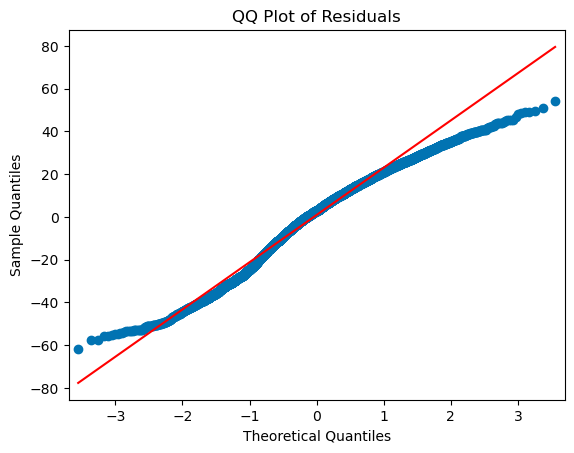

In [99]:
import statsmodels.api as sm

# Calculate residuals
y_pred = best_model1.predict(X_test)
residuals = y_test - y_pred

# Create QQ plot
sm.qqplot(residuals, line ='q') 
plt.title('QQ Plot of Residuals')
plt.show()

The middle section nicely falls on the normal distribution line but the edges could be improved, especially the upper part. Let's also visualize the actual and predicted y values for the test data.

<Figure size 1800x1400 with 0 Axes>

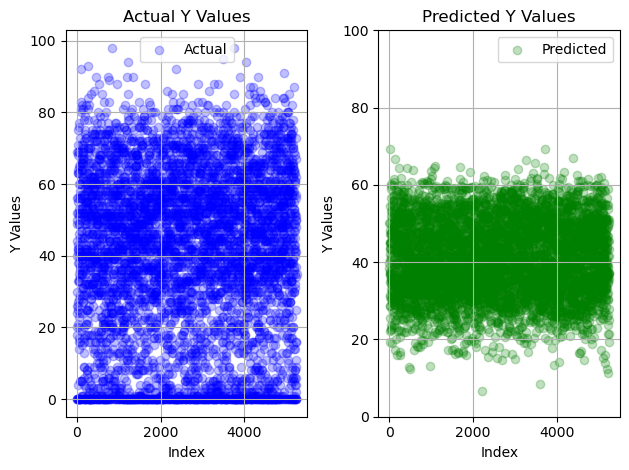

In [100]:
# create a figure and two subplots
plt.figure(figsize=(18, 14))
plt.subplots(1,2)

# plot actual y values
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.25)
plt.title('Actual Y Values')
plt.xlabel('Index')
plt.ylabel('Y Values')
plt.legend()
plt.grid(True)

# plot predicted y values
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_pred_test, color='green', label='Predicted', alpha=0.25)
plt.title('Predicted Y Values')
plt.xlabel('Index')
plt.ylabel('Y Values')
plt.yticks(np.arange(0, 101, 20))  # make the same as the other subplot
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

The model predicts mostly only values between 10 and 70.

Let's do another model search but this time excluding the extremely low popularity scores.

### Linear Regression Model 2

In [104]:
df4 = df3[df3['track_popularity']!=0] # exclude zero popularity scores
df4.shape

(23965, 59)

Now there are 2264 less songs to predict popularity scores for, and none of them has zero popularity. The popularity scorre distributions look more normal, as visualized below.

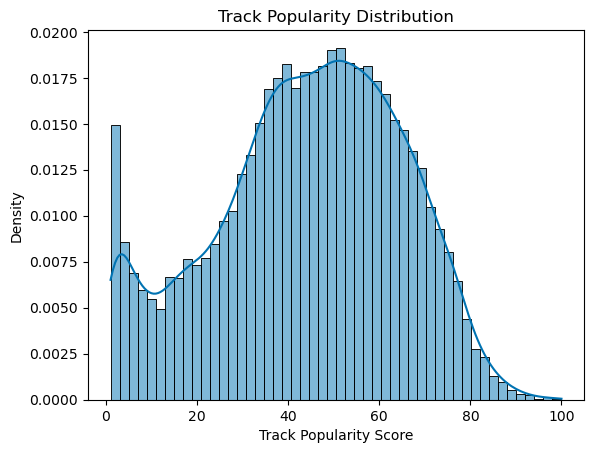

In [105]:
plt.figure()
sns.histplot(df4['track_popularity'], kde=True, stat='density')
plt.title('Track Popularity Distribution')
plt.xlabel('Track Popularity Score')
plt.show()

Maybe we need to exclude 1 as well. 

In [106]:
df5 = df3[df3['track_popularity']>1] # exclude below 1 popularity scores
df5.shape

(23530, 59)

This is 435 less songs. 

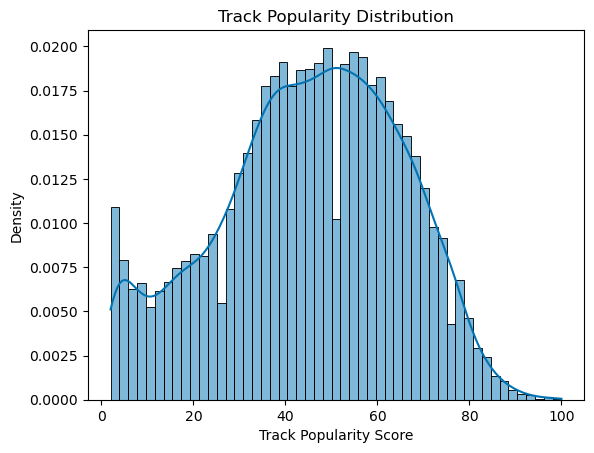

In [107]:
plt.figure()
sns.histplot(df5['track_popularity'], kde=True, stat='density')
plt.title('Track Popularity Distribution')
plt.xlabel('Track Popularity Score')
plt.show()

Let's do the test and train split and proceed to the same grid search and find the best linear regression model.

In [108]:
X = df5.iloc[:, 1:] # all the columns except for the target column that is the first one
y = df5['track_popularity'] # the target column

In [109]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [110]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(18824, 58) (18824,) (4706, 58) (4706,)


In [111]:
# Define the columns for MinMaxScaler and StandardScaler
minmax_cols = ['danceability', 'valence', 'tempo', 'duration_ms']
standard_cols = ['loudness', 'log_speechiness', 'log_acousticness', 'log_instrumentalness', 'log_liveness']

# Create a ColumnTransformer to apply different scalers to different columns
scaler = ColumnTransformer([
    ('minmax_scaler', MinMaxScaler(), minmax_cols),
    ('standard_scaler', StandardScaler(), standard_cols)
], remainder='passthrough')  # Leave other columns unchanged

# Define the pipeline with estimators
estimators = [
    ('scaling', scaler),
    ('dimred', PCA()),  # Dimensionality reduction using PCA
    ('model', Lasso())  # Lasso linear regression
]

# Create the pipeline
pipe = Pipeline(estimators)

# Caching for the pipeline
cachedir = mkdtemp()
cached_pipe = Pipeline(estimators, memory=cachedir)

# Define parameter distributions
param_grid = [
    {
        'dimred__n_components': [0.9, None],  # Percentage of variance or None for no reduction
        'model': [Lasso()],  # Lasso regression
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Example values for Lasso alpha
    },
    {
        'dimred__n_components': [0.9, None],  # Percentage of variance or None for no reduction
        'model': [Ridge()],  # Ridge regression
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Example values for Ridge alpha
        'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']  # Solvers appropriate for Ridge
    }
]

# Initialize GridSearchCV
grid = GridSearchCV(cached_pipe, param_grid, cv=5)

# Fit the grid search on the training data
fitted_grid = grid.fit(X_train, y_train)

# Get the best model from the grid search
best_model2 = fitted_grid.best_estimator_

# Use the best model to make predictions on the test set
y_pred_test = best_model2.predict(X_test)

# Calculate the mean absolute error (MAE) on the test set
test_mae = mean_absolute_error(y_test, y_pred_test)

# Get test R-squared
test_r2 = r2_score(y_test, y_pred_test)

# Use the best model to make predictions on the training set
y_pred_train = best_model2.predict(X_train)

# Calculate the training R-squared
train_r2 = r2_score(y_train, y_pred_train)

# Print the best parameters and test scores
print("Best Parameters:", fitted_grid.best_params_)
print("Training R-squared:", train_r2)
print("Best Model2 Test MAE:", test_mae)
print("Best Model2 Test R-squared:", test_r2)

Best Parameters: {'dimred__n_components': None, 'model': Ridge(alpha=1, solver='lsqr'), 'model__alpha': 1, 'model__solver': 'lsqr'}
Training R-squared: 0.16418227808267938
Best Model2 Test MAE: 14.5495594648376
Best Model2 Test R-squared: 0.15995358678911942


The best model is a Ridge linear regression model with alpha=1 for regularization, and 'lsqr' for solver, and with no dimensionality reduction like before. The variance that can be explained by this model is a little lower than the previous model, and it's overfitting a bit more (16.4% vs. 15.9%) than the previous model. The mean absolute error is lower than the previous model: 14.5 (as opposed to 17.2). 

Let's plot the residuals on a QQ plot. If they are normally distributed, they should align with the red line in the graph.

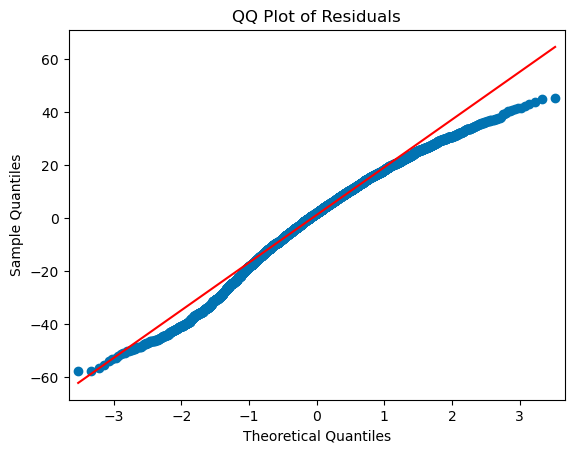

In [112]:
# Calculate residuals
y_pred = best_model2.predict(X_test)
residuals = y_test - y_pred

# Create QQ plot
sm.qqplot(residuals, line ='q') 
plt.title('QQ Plot of Residuals')
plt.show()

This does not look much better than the previous one. The lower end of residuals are closer to the red line which shows normal distribution. Let's also plot the actual and predicted values.

<Figure size 1800x1400 with 0 Axes>

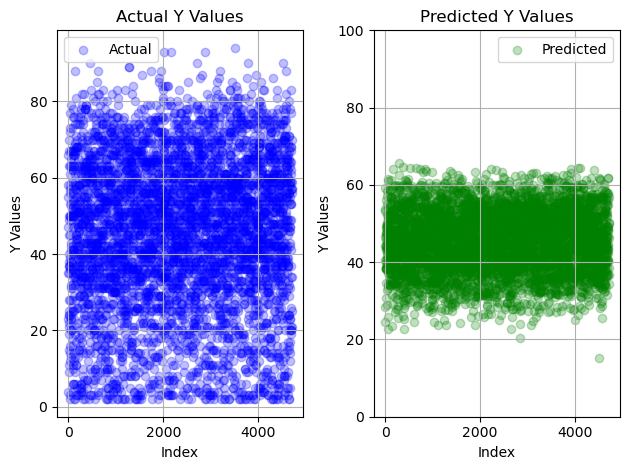

In [113]:
# create a figure and two subplots
plt.figure(figsize=(18, 14))
plt.subplots(1,2)

# plot actual y values
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.25)
plt.title('Actual Y Values')
plt.xlabel('Index')
plt.ylabel('Y Values')
plt.legend()
plt.grid(True)

# plot predicted y values
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_pred_test, color='green', label='Predicted', alpha=0.25)
plt.title('Predicted Y Values')
plt.xlabel('Index')
plt.ylabel('Y Values')
plt.yticks(np.arange(0, 101, 20))  # make the same as the other subplot
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

This model predicts a narrower range of popularity scores compared to the first one. This explains the lower R-squared value as well. We have also lost some good amount of data points when we filtered the data for a popularity score above 1. On the other hand, the mean absolute error is lower now. Both models have pluses and minuses. They provide good baseline models that I can improve.

In the next notebook, I retrieve lyrics from using Genius API. Next steps are to clean the text and retrieve features from it to build other models that are better at predicting song popularity scores.

In [114]:
# save the dataframe to merge with cleaned lyrics later (commented not to run by mistake)
df3.to_csv('../datasets/all_songs_without_lyrics_as_in_baseline_model.csv', index=True)